In [ ]:
import os
import sys
import subprocess
import platform
import json
import networkx as nx
import traceback
from tests.test_learning_journeys import DataStore
from ranking_methods import CommunityDetectionComparison
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import logging
import pandas as pd
import numpy as np
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor
import itertools

from app import SUBECT_PREFIX

def flatten(list2d):
    return list(itertools.chain.from_iterable(list2d))



# Configure the root logger
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler(sys.stdout)]
)

logger = logging.getLogger(__name__)

data_store = DataStore()
system = platform.system()


class GraphBuilder:
    def __init__(self, number_of_plots):
        self.fig, axes = plt.subplots(number_of_plots, 1, figsize=(12, 7 * number_of_plots))
        self.axes = axes if number_of_plots > 1 else [axes]
        self.current_plot = 0

    def plot_graph(self, df, title=None):
        if self.current_plot >= len(self.axes):
            raise ValueError("All available plots have been used.")

        ax = self.axes[self.current_plot]
        plot_df = df.drop(['macro avg', 'weighted avg'], errors='ignore')

        # Plotting
        plot_df[['precision', 'recall', 'accuracy', 'f1_score']].plot(kind='bar', ax=ax)

        ax.set_title(title or 'Classification Report Metrics by Class')
        ax.set_ylabel('Score')
        ax.set_xlabel('Class')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.grid(axis='y')
        ax.legend(loc='upper right')

        self.current_plot += 1

    def plot_accuracy(self, df, title=None):
        if self.current_plot >= len(self.axes):
            raise ValueError("All available plots have been used.")

        ax = self.axes[self.current_plot]

        plot_df = df.drop(['macro avg', 'weighted avg'], errors='ignore')

        # Plotting
        plot_df[['percentage_covered']].plot(kind='bar', ax=ax)

        ax.set_title(title or 'Percentage of path covered')
        ax.set_ylabel('Percentage covered')
        ax.set_xlabel('Class')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.grid(axis='y')
        ax.legend(loc='upper right')

        self.current_plot += 1

    def show_plots(self):
        plt.tight_layout()
        plt.show()

def run_scraper(start_link):
    venv_location = '../../../../.venv/bin/python'
    if system == "Windows":
        logger.info("Warning: running on Windows")
        venv_location = '../../../../.venv/Scripts/python'
    script_path = os.path.abspath("app.py")
    logger.info("subprocess started")
    subprocess.call([venv_location, script_path, start_link])
    logger.info("subprocess finished")

2024-11-22 19:35:17,571 - __main__ - INFO - For the following link: Graph_theory, these nodes are ok:


precision    recall  f1_score  accuracy  \
louvain_communities             0.125000  0.015038  0.026846  0.125000   
label_propagation_communities   0.117647  0.015038  0.026667  0.117647   
pagerank                        0.250000  0.015038  0.028369  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      1.503759            16          133   
label_propagation_communities            1.503759            17          133   
pagerank                                 1.503759             8          133   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Glossary_of_gra...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Glossary_of_gra...   
pagerank                       [https://en.wikipedia.org/wiki/Glossary_of_gra...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_theory, h...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_theory, h...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_theory, h...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                              24.06015             0.013596  
label_propagation_communities                    24.06015             0.013514  
pagerank                                         24.06015             0.014388

2024-11-22 19:36:26,193 - __main__ - INFO - For the following link: Graph_drawing, these nodes are ok:


precision    recall  f1_score  accuracy  \
louvain_communities             0.400000  0.037037  0.067797  0.400000   
label_propagation_communities   0.307692  0.037037  0.066116  0.307692   
pagerank                        0.375000  0.027778  0.051724  0.375000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      3.703704            10          108   
label_propagation_communities            3.703704            13          108   
pagerank                                 2.777778             8          108   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_(discrete...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_(discrete...   
pagerank                       [https://en.wikipedia.org/wiki/Information_vis...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_drawing, ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_drawing, ...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_drawing, ...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                              20.37037             0.033990  
label_propagation_communities                    20.37037             0.034188  
pagerank                                         20.37037             0.026549

2024-11-22 19:37:29,564 - __main__ - INFO - For the following link: Abstract_data_type, these nodes are ok:


precision    recall  f1_score  accuracy  \
louvain_communities             0.333333  0.058824  0.100000  0.333333   
label_propagation_communities   0.210526  0.058824  0.091954  0.210526   
pagerank                        0.375000  0.044118  0.078947  0.375000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      5.882353            12           68   
label_propagation_communities            5.882353            19           68   
pagerank                                 4.411765             8           68   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Algorithm, http...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Comment_(comput...   
pagerank                       [https://en.wikipedia.org/wiki/Computer_scienc...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Abstract_data_t...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Abstract_data_t...   
pagerank                       [https://en.wikipedia.org/wiki/Abstract_data_t...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             35.294118             0.051424  
label_propagation_communities                   35.294118             0.048193  
pagerank                                        35.294118             0.041096

2024-11-22 19:38:31,440 - __main__ - INFO - For the following link: Matroid, these nodes are ok:


precision    recall  f1_score  accuracy  \
louvain_communities             0.285714  0.055556  0.093023  0.285714   
label_propagation_communities   0.190476  0.055556  0.086022  0.190476   
pagerank                        0.375000  0.041667  0.075000  0.375000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      5.555556            14           72   
label_propagation_communities            5.555556            21           72   
pagerank                                 4.166667             8           72   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Abstract_simpli...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Geometric_latti...   
pagerank                       [https://en.wikipedia.org/wiki/Combinatorics, ...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Matroid, https:...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Matroid, https:...   
pagerank                       [https://en.wikipedia.org/wiki/Matroid, https:...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             31.944444             0.047566  
label_propagation_communities                   31.944444             0.044944  
pagerank                                        31.944444             0.038961

2024-11-22 19:39:26,236 - __main__ - INFO - For the following link: Graph_theory, these nodes are ok:


precision    recall  f1_score  accuracy  \
louvain_communities             0.125000  0.041667  0.062500  0.125000   
label_propagation_communities   0.117647  0.041667  0.061538  0.117647   
pagerank                        0.250000  0.041667  0.071429  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      4.166667            16           48   
label_propagation_communities            4.166667            17           48   
pagerank                                 4.166667             8           48   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Glossary_of_gra...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Glossary_of_gra...   
pagerank                       [https://en.wikipedia.org/wiki/Glossary_of_gra...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_theory, h...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_theory, h...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_theory, h...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             27.083333             0.032207  
label_propagation_communities                   27.083333             0.031746  
pagerank                                        27.083333             0.037037

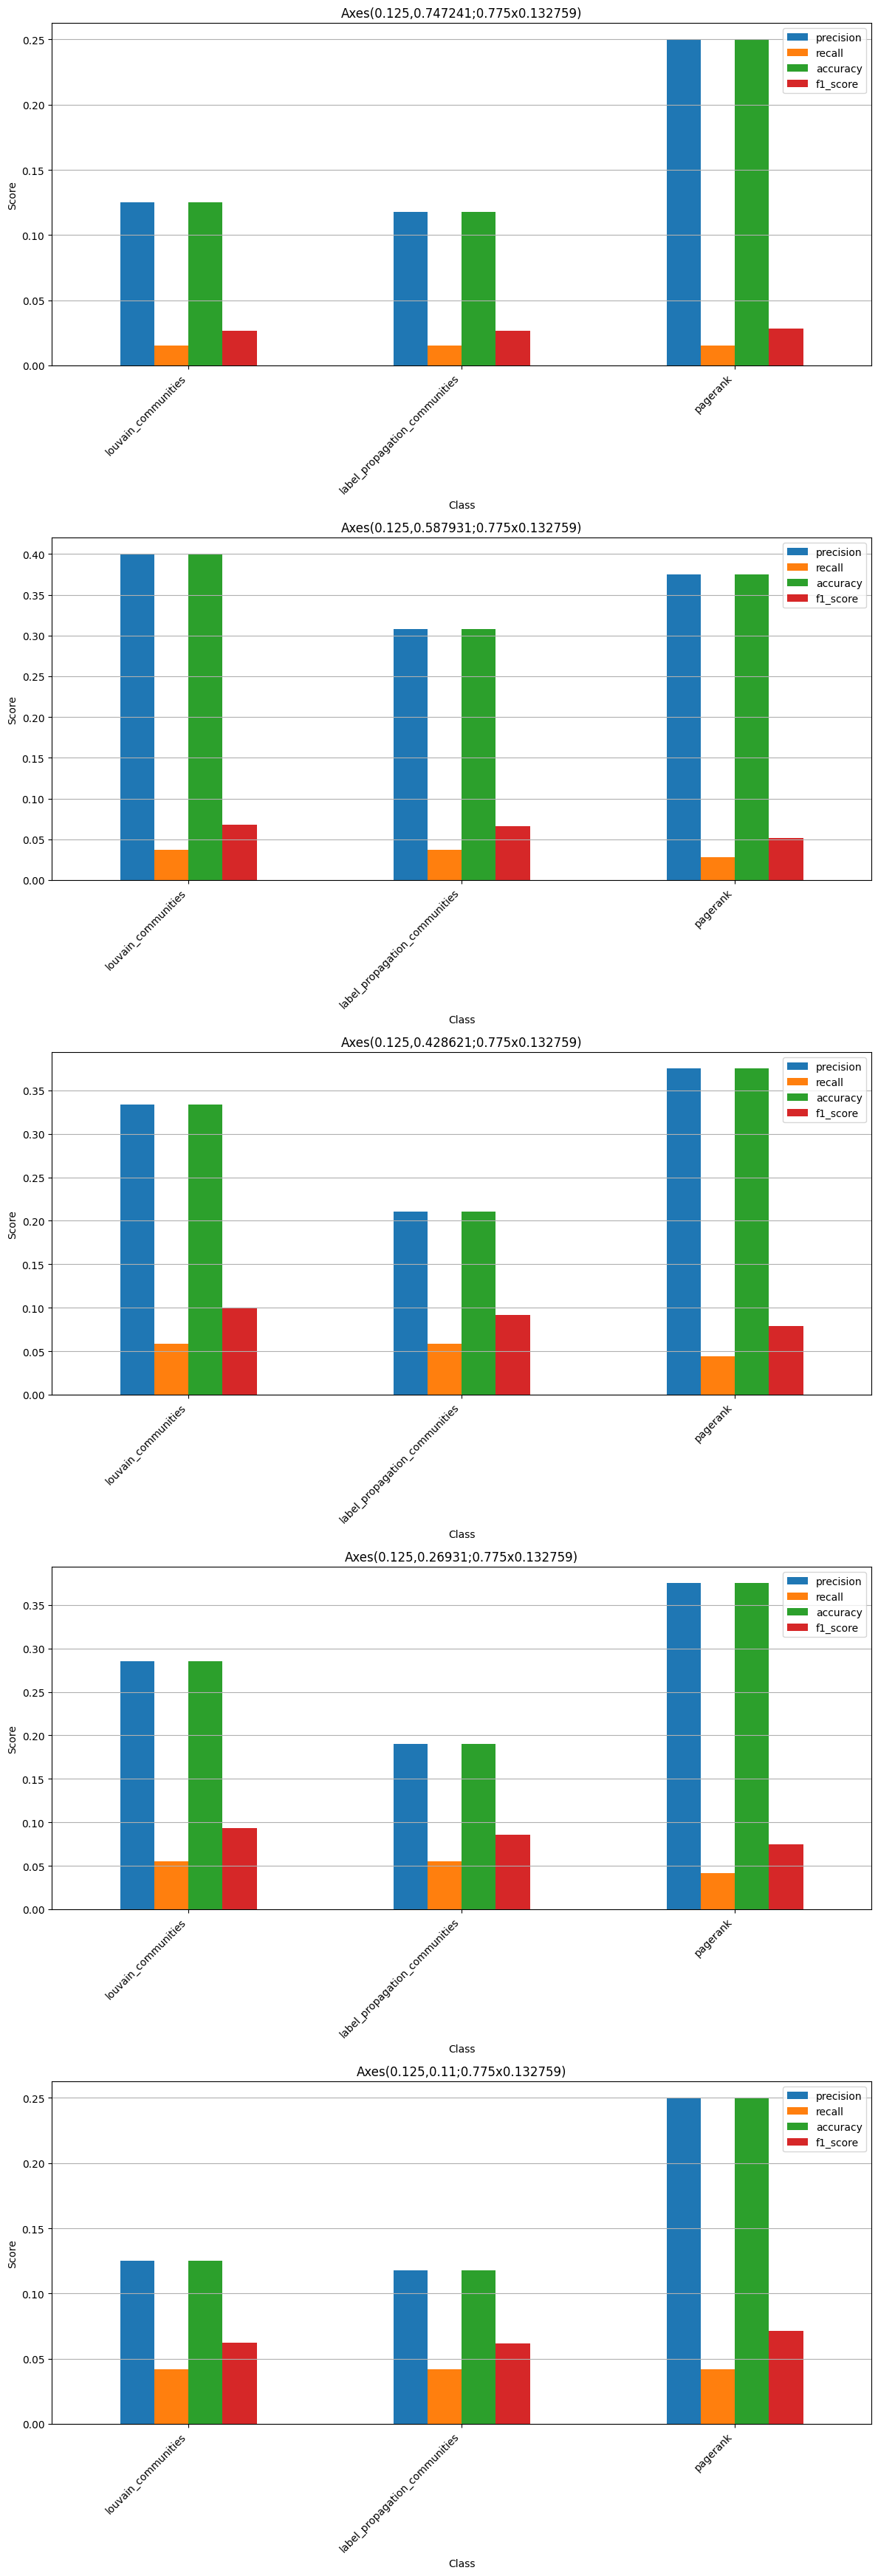

Average is: 3.910047449779132


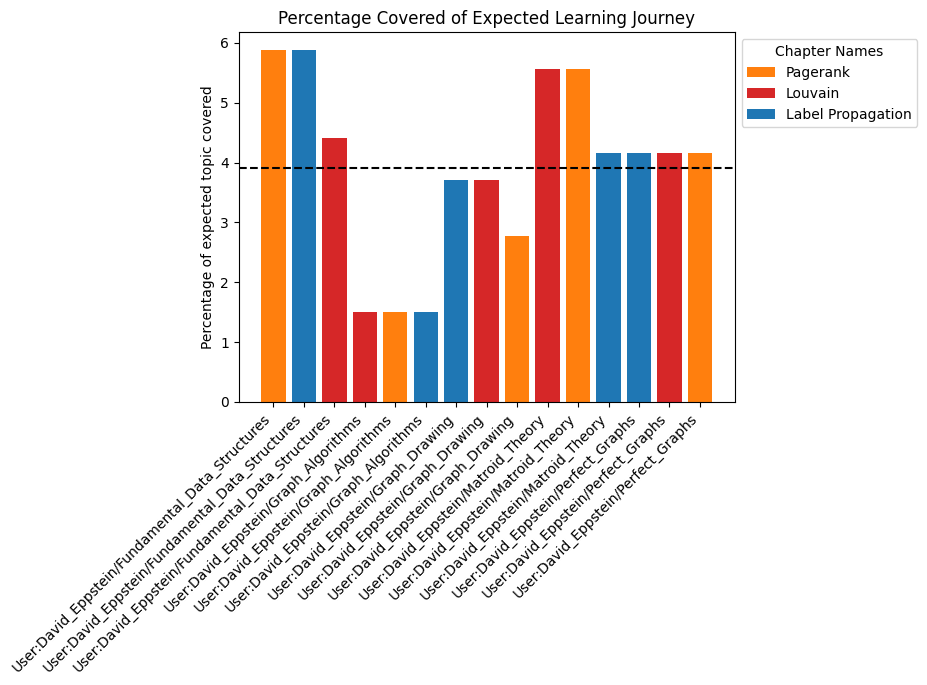

In [ ]:
graph_builder = GraphBuilder(len(data_store.link_map))
percentages = []
scraper_percentages = []
start_links = []
tracking_counter = 0

for counter, (link, learning_links) in enumerate(data_store.link_map.items()):
    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
    <!-- Materialize CSS -->
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
    
    <!-- Material Icons -->
    <link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet">
    </head>
    <body>
    <h3 class="custom-header">For learning journey: {link}</h3>

    <!-- Materialize JavaScript -->
    <script src="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/js/materialize.min.js"></script>
    </body>
    </html>
    """
    tracking_counter = counter

    display(HTML(html_content))
    learning_links = [learning_link for learning_link in learning_links if f"https://{SUBECT_PREFIX}.wikipedia.org/wiki/" in learning_link]
    link = link.replace(f"https://{SUBECT_PREFIX}.wikipedia.org/wiki/", "")
    start_link = learning_links[0].replace(f"https://{SUBECT_PREFIX}.wikipedia.org/wiki/", "")
    if not os.path.exists(f'{start_link}_visualisation_data_graph.json'):
        run_scraper(start_link)
    with open(f'{start_link}_visualisation_data_graph.json', 'r') as f:
        network_data = json.load(f)
    graph = nx.node_link_graph(network_data)
    try:
        community_detection_comparison = CommunityDetectionComparison(graph, start_link, learning_links)
        community_evaluations = community_detection_comparison.get_evaluations()
        logger.info(f"For the following link: {start_link}, these nodes are ok:")
        display(community_evaluations)
        graph_builder.plot_graph(community_evaluations, graph_builder.axes[counter])
        percentages.append(community_evaluations["percentage_covered"].values)
        scraper_percentages.append(community_evaluations["scraper_percentage_covered"].values)
        start_links.append(link)
    except Exception:
        logger.info("Unable to parse specific learning journey, reason is:")
        logger.info(traceback.format_exc())
        
graph_builder.show_plots()


percentage_fig, percentage_ax = plt.subplots()

bar_labels = ['Louvain', 'Label Propagation', 'Pagerank']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']


start_links_total = np.array(start_links * 3)
percentages_total = []
for i in range(3):
    percentages_total += [j[i] for j in percentages]
percentages_total = np.array(percentages_total)
colors = ['tab:red', 'tab:blue', 'tab:orange']
bar_colors = np.array([colors[i % len(colors)] for i in range(3 * len(start_links))])
labels = ['_Louvain', '_Label Propagation', '_Pagerank']
bar_labels = [labels[i % len(labels)] for i in range(3 * len(start_links))]
bar_labels = np.array(['Louvain', 'Label Propagation', 'Pagerank'] + bar_labels[3:])
correct_indexes = np.argsort(start_links_total)
stubs = np.arange(len(start_links_total))
percentage_ax.bar(stubs, percentages_total[correct_indexes], label=bar_labels[correct_indexes], color=bar_colors[correct_indexes])
percentage_ax.set_xticks(stubs)
percentage_ax.set_xticklabels(start_links_total[correct_indexes], rotation=45, ha='right')
percentage_ax.set_ylabel('Percentage of expected topic covered')
percentage_ax.set_title('Percentage Covered of Expected Learning Journey')
percentage_ax.legend(title='Chapter Names', loc='upper left', bbox_to_anchor=(1, 1))
average_percentage_covered = np.average(percentages_total)
percentage_ax.axhline(y=average_percentage_covered, linestyle='--', label='Average', color='k')
print(f"Average is: {average_percentage_covered}")

plt.show()

Notes

This was for the greedy modularity algo

```python
{'precision': 0.14285714285714285, 'recall': 0.015037593984962405, 'f1_score': 0.0272108843537415, 'accuracy': 0.14285714285714285}
```

2024-11-22 19:39:28,101 - __main__ - INFO - Length of the chapters are 54
2024-11-22 19:39:28,104 - __main__ - INFO - Length of the chapters static are 54


Test
[{'text': 'Array data type', 'href': 'https://en.wikipedia.org/wiki/Array_data_type', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Array data structure', 'href': 'https://en.wikipedia.org/wiki/Array_data_structure', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Dynamic array', 'href': 'https://en.wikipedia.org/wiki/Dynamic_array', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Linked list', 'href': 'https://en.wikipedia.org/wiki/Linked_list', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Doubly linked list', 'href': 'https://en.wikipedia.org/wiki/Doubly_linked_list', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Stack (abstract data type)', 'href': 'https://en.wikipedia.org/wiki/Stack_(abstract_data_type)', 'book': 

precision    recall  f1_score  accuracy  \
louvain_communities             0.111111  0.222222  0.148148  0.111111   
label_propagation_communities   0.133333  0.222222  0.166667  0.133333   
pagerank                        0.125000  0.111111  0.117647  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     22.222222            18            9   
label_propagation_communities           22.222222            15            9   
pagerank                                11.111111             8            9   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Variable_(compu...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Variable_(compu...   
pagerank                       [https://en.wikipedia.org/wiki/Variable_(compu...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Array_data_type...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Array_data_type...   
pagerank                       [https://en.wikipedia.org/wiki/Array_data_type...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             88.888889             0.074667  
label_propagation_communities                   88.888889             0.090909  
pagerank                                        88.888889             0.062500

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.111111  0.222222  0.148148  0.111111   
label_propagation_communities   0.133333  0.222222  0.166667  0.133333   
pagerank                        0.125000  0.111111  0.117647  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     22.222222            18            9   
label_propagation_communities           22.222222            15            9   
pagerank                                11.111111             8            9   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Variable_(compu...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Variable_(compu...   
pagerank                       [https://en.wikipedia.org/wiki/Variable_(compu...   

                        

Test
[{'text': 'Connected components', 'href': 'https://en.wikipedia.org/wiki/Component_(graph_theory)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Edge connectivity', 'href': 'https://en.wikipedia.org/wiki/K-edge-connected_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Vertex connectivity', 'href': 'https://en.wikipedia.org/wiki/K-vertex-connected_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Menger's theorems on edge and vertex connectivity", 'href': 'https://en.wikipedia.org/wiki/Menger%27s_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Ear decomposition', 'href': 'https://en.wikipedia.org/wiki/Ear_decomposition', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Algorithms for 2-edge-connected components', 'href': 'https://en.wikipedia.org/wiki/Bri

precision    recall  f1_score  accuracy  \
louvain_communities             0.071429  0.111111  0.086957  0.071429   
label_propagation_communities   0.058824  0.111111  0.076923  0.058824   
pagerank                        0.125000  0.111111  0.117647  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     11.111111            14            9   
label_propagation_communities           11.111111            17            9   
pagerank                                11.111111             8            9   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Disjoint_set, h...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Disjoint_set, h...   
pagerank                       [https://en.wikipedia.org/wiki/Disjoint_set, h...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Component_(grap...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Component_(grap...   
pagerank                       [https://en.wikipedia.org/wiki/Component_(grap...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             44.444444             0.040134  
label_propagation_communities                   44.444444             0.040000  
pagerank                                        44.444444             0.062500

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.071429  0.111111  0.086957  0.071429   
label_propagation_communities   0.058824  0.111111  0.076923  0.058824   
pagerank                        0.125000  0.111111  0.117647  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     11.111111            14            9   
label_propagation_communities           11.111111            17            9   
pagerank                                11.111111             8            9   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Disjoint_set, h...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Disjoint_set, h...   
pagerank                       [https://en.wikipedia.org/wiki/Disjoint_set, h...   

                        

Test
[{'text': 'Strongly connected components', 'href': 'https://en.wikipedia.org/wiki/Strongly_connected_component', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Tarjan's strongly connected components algorithm", 'href': 'https://en.wikipedia.org/wiki/Tarjan%27s_strongly_connected_components_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Path-based strong component algorithm', 'href': 'https://en.wikipedia.org/wiki/Path-based_strong_component_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Kosaraju's strongly connected components algorithm", 'href': 'https://en.wikipedia.org/wiki/Kosaraju%27s_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Reachability', 'href': 'https://en.wikipedia.org/wiki/Reachability', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'},

precision  recall  f1_score  accuracy  \
louvain_communities             0.181818    0.25  0.210526  0.181818   
label_propagation_communities   0.100000    0.25  0.142857  0.100000   
pagerank                        0.250000    0.25  0.250000  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          25.0            11            8   
label_propagation_communities                25.0            20            8   
pagerank                                     25.0             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/If_and_only_if,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Induced_subgrap...   
pagerank                       [https://en.wikipedia.org/wiki/Reachability, h...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Strongly_connec...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Strongly_connec...   
pagerank                       [https://en.wikipedia.org/wiki/Strongly_connec...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  50.0             0.101063  
label_propagation_communities                        50.0             0.076923  
pagerank                                             50.0             0.142857

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.181818    0.25  0.210526  0.181818   
label_propagation_communities   0.100000    0.25  0.142857  0.100000   
pagerank                        0.250000    0.25  0.250000  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          25.0            11            8   
label_propagation_communities                25.0            20            8   
pagerank                                     25.0             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/If_and_only_if,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Induced_subgrap...   
pagerank                       [https://en.wikipedia.org/wiki/Reachability, h...   

                                

Test
[{'text': 'Shortest path problem', 'href': 'https://en.wikipedia.org/wiki/Shortest_path_problem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Dijkstra's algorithm for single-source shortest paths with positive edge lengths", 'href': 'https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Bellman–Ford algorithm for single-source shortest paths allowing negative edge lengths', 'href': 'https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Johnson's algorithm for all-pairs shortest paths in sparse graphs", 'href': 'https://en.wikipedia.org/wiki/Johnson%27s_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Floyd–Warshall algorithm for all-pairs shortest paths in dense graphs', 'href': 'https://en.wikipedia.

precision    recall  f1_score  accuracy  \
louvain_communities             0.083333  0.071429  0.076923  0.083333   
label_propagation_communities   0.083333  0.071429  0.076923  0.083333   
pagerank                        0.125000  0.071429  0.090909  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      7.142857            12           14   
label_propagation_communities            7.142857            12           14   
pagerank                                 7.142857             8           14   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_(discrete...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_(discrete...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Shortest_path_p...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Shortest_path_p...   
pagerank                       [https://en.wikipedia.org/wiki/Shortest_path_p...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             35.714286             0.039385  
label_propagation_communities                   35.714286             0.040000  
pagerank                                        35.714286             0.047619

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.083333  0.071429  0.076923  0.083333   
label_propagation_communities   0.083333  0.071429  0.076923  0.083333   
pagerank                        0.125000  0.071429  0.090909  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      7.142857            12           14   
label_propagation_communities            7.142857            12           14   
pagerank                                 7.142857             8           14   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_(discrete...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_(discrete...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                        

Test
[{'text': 'Minimum spanning tree', 'href': 'https://en.wikipedia.org/wiki/Minimum_spanning_tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Borůvka's algorithm", 'href': 'https://en.wikipedia.org/wiki/Bor%C5%AFvka%27s_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Kruskal's algorithm", 'href': 'https://en.wikipedia.org/wiki/Kruskal%27s_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Prim's algorithm", 'href': 'https://en.wikipedia.org/wiki/Prim%27s_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Edmonds's algorithm for directed minimum spanning trees", 'href': 'https://en.wikipedia.org/wiki/Edmonds%27_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Degree-constrained spanning tree', 'href': 'https://en.wikipedia.org/wiki/Degr

precision    recall  f1_score  accuracy  \
louvain_communities             0.062500  0.090909  0.074074  0.062500   
label_propagation_communities   0.058824  0.090909  0.071429  0.058824   
pagerank                        0.125000  0.090909  0.105263  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      9.090909            16           11   
label_propagation_communities            9.090909            17           11   
pagerank                                 9.090909             8           11   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Robert_C._Prim,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Robert_C._Prim,...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Minimum_spannin...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Minimum_spannin...   
pagerank                       [https://en.wikipedia.org/wiki/Minimum_spannin...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                              9.090909             0.038034  
label_propagation_communities                    9.090909             0.037037  
pagerank                                         9.090909             0.055556

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.062500  0.090909  0.074074  0.062500   
label_propagation_communities   0.058824  0.090909  0.071429  0.058824   
pagerank                        0.125000  0.090909  0.105263  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      9.090909            16           11   
label_propagation_communities            9.090909            17           11   
pagerank                                 9.090909             8           11   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Robert_C._Prim,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Robert_C._Prim,...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                        

Test
[{'text': 'Clique problem', 'href': 'https://en.wikipedia.org/wiki/Clique_problem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Bron–Kerbosch algorithm for listing all maximal cliques', 'href': 'https://en.wikipedia.org/wiki/Bron%E2%80%93Kerbosch_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Independent set problem', 'href': 'https://en.wikipedia.org/wiki/Independent_set_(graph_theory)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Maximal independent set', 'href': 'https://en.wikipedia.org/wiki/Maximal_independent_set', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Graph coloring', 'href': 'https://en.wikipedia.org/wiki/Graph_coloring', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Bipartite graph', 'href': 'https://en.wikipedia.org/wiki/Bipartite_graph'

precision  recall  f1_score  accuracy  \
louvain_communities             0.066667   0.125  0.086957  0.066667   
label_propagation_communities   0.062500   0.125  0.083333  0.062500   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            15            8   
label_propagation_communities                12.5            16            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Social_network,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Social_network,...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Clique_problem,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Clique_problem,...   
pagerank                       [https://en.wikipedia.org/wiki/Clique_problem,...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  62.5             0.044466  
label_propagation_communities                        62.5             0.043478  
pagerank                                             62.5             0.066667

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.066667   0.125  0.086957  0.066667   
label_propagation_communities   0.062500   0.125  0.083333  0.062500   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            15            8   
label_propagation_communities                12.5            16            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Social_network,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Social_network,...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                                

Test
[{'text': 'Vertex cover', 'href': 'https://en.wikipedia.org/wiki/Vertex_cover', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Dominating set', 'href': 'https://en.wikipedia.org/wiki/Dominating_set', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Feedback vertex set', 'href': 'https://en.wikipedia.org/wiki/Feedback_vertex_set', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Feedback arc set', 'href': 'https://en.wikipedia.org/wiki/Feedback_arc_set', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}]
2024-11-22 19:46:33,972 - __main__ - INFO - For the following link: Vertex_cover, these nodes are ok:


precision  recall  f1_score  accuracy  \
louvain_communities               0.0500    0.25  0.083333    0.0500   
label_propagation_communities     0.0625    0.25  0.100000    0.0625   
pagerank                          0.1250    0.25  0.166667    0.1250   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          25.0            20            4   
label_propagation_communities                25.0            16            4   
pagerank                                     25.0             8            4   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Computational_c...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Hard_to_approxi...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Vertex_cover, h...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Vertex_cover, h...   
pagerank                       [https://en.wikipedia.org/wiki/Vertex_cover, h...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  50.0             0.043478  
label_propagation_communities                        50.0             0.052632  
pagerank                                             50.0             0.090909

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities               0.0500    0.25  0.083333    0.0500   
label_propagation_communities     0.0625    0.25  0.100000    0.0625   
pagerank                          0.1250    0.25  0.166667    0.1250   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          25.0            20            4   
label_propagation_communities                25.0            16            4   
pagerank                                     25.0             8            4   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Computational_c...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Hard_to_approxi...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                                

Test
[{'text': 'Eulerian path', 'href': 'https://en.wikipedia.org/wiki/Eulerian_path', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Hamiltonian path', 'href': 'https://en.wikipedia.org/wiki/Hamiltonian_path', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Hamiltonian path problem', 'href': 'https://en.wikipedia.org/wiki/Hamiltonian_path_problem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Travelling salesman problem', 'href': 'https://en.wikipedia.org/wiki/Travelling_salesman_problem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Bottleneck traveling salesman problem', 'href': 'https://en.wikipedia.org/wiki/Bottleneck_traveling_salesman_problem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Christofides' heuristic for the TSP", 'href': 'https://en.wikipedia.org/wiki/Chr

precision    recall  f1_score  accuracy  \
louvain_communities             0.055556  0.142857  0.080000  0.055556   
label_propagation_communities   0.050000  0.142857  0.074074  0.050000   
pagerank                        0.125000  0.142857  0.133333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     14.285714            18            7   
label_propagation_communities           14.285714            20            7   
pagerank                                14.285714             8            7   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Trail_(graph_th...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Mathematical_pr...   
pagerank                       [https://en.wikipedia.org/wiki/Trail_(graph_th...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Eulerian_path, ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Eulerian_path, ...   
pagerank                       [https://en.wikipedia.org/wiki/Eulerian_path, ...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             42.857143             0.040346  
label_propagation_communities                   42.857143             0.038462  
pagerank                                        42.857143             0.071429

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.055556  0.142857  0.080000  0.055556   
label_propagation_communities   0.050000  0.142857  0.074074  0.050000   
pagerank                        0.125000  0.142857  0.133333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     14.285714            18            7   
label_propagation_communities           14.285714            20            7   
pagerank                                14.285714             8            7   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Trail_(graph_th...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Mathematical_pr...   
pagerank                       [https://en.wikipedia.org/wiki/Trail_(graph_th...   

                        

Test
[{'text': 'Matching', 'href': 'https://en.wikipedia.org/wiki/Matching_(graph_theory)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Hopcroft–Karp algorithm for maximum matching in bipartite graphs', 'href': 'https://en.wikipedia.org/wiki/Hopcroft%E2%80%93Karp_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Edmonds's algorithm for maximum matching in non-bipartite graphs", 'href': 'https://en.wikipedia.org/wiki/Blossom_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Assignment problem', 'href': 'https://en.wikipedia.org/wiki/Assignment_problem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Hungarian algorithm for the assignment problem', 'href': 'https://en.wikipedia.org/wiki/Hungarian_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'FKT al

precision  recall  f1_score  accuracy  \
louvain_communities             0.058824     0.1  0.074074  0.058824   
label_propagation_communities   0.052632     0.1  0.068966  0.052632   
pagerank                        0.125000     0.1  0.111111  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          10.0            17           10   
label_propagation_communities                10.0            19           10   
pagerank                                     10.0             8           10   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Bipartite_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Odd_number, htt...   
pagerank                       [https://en.wikipedia.org/wiki/Bipartite_graph...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Matching_(graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Matching_(graph...   
pagerank                       [https://en.wikipedia.org/wiki/Matching_(graph...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  40.0             0.037179  
label_propagation_communities                        40.0             0.035714  
pagerank                                             40.0             0.058824

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.058824     0.1  0.074074  0.058824   
label_propagation_communities   0.052632     0.1  0.068966  0.052632   
pagerank                        0.125000     0.1  0.111111  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          10.0            17           10   
label_propagation_communities                10.0            19           10   
pagerank                                     10.0             8           10   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Bipartite_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Odd_number, htt...   
pagerank                       [https://en.wikipedia.org/wiki/Bipartite_graph...   

                                

Test
[{'text': 'Maximum flow problem', 'href': 'https://en.wikipedia.org/wiki/Maximum_flow_problem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Max-flow min-cut theorem', 'href': 'https://en.wikipedia.org/wiki/Max-flow_min-cut_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Ford–Fulkerson algorithm for maximum flows', 'href': 'https://en.wikipedia.org/wiki/Ford%E2%80%93Fulkerson_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Edmonds–Karp algorithm for maximum flows', 'href': 'https://en.wikipedia.org/wiki/Edmonds%E2%80%93Karp_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Dinic's algorithm for maximum flows", 'href': 'https://en.wikipedia.org/wiki/Dinic%27s_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Push–relabel maximum flow al

precision  recall  f1_score  accuracy  \
louvain_communities             0.176471   0.375  0.240000  0.176471   
label_propagation_communities   0.166667   0.375  0.230769  0.166667   
pagerank                        0.250000   0.250  0.250000  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          37.5            17            8   
label_propagation_communities                37.5            18            8   
pagerank                                     25.0             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Ted_Harris_(mat...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Ted_Harris_(mat...   
pagerank                       [https://en.wikipedia.org/wiki/Ted_Harris_(mat...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Maximum_flow_pr...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Maximum_flow_pr...   
pagerank                       [https://en.wikipedia.org/wiki/Maximum_flow_pr...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  37.5             0.131621  
label_propagation_communities                        37.5             0.130435  
pagerank                                             37.5             0.142857

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.176471   0.375  0.240000  0.176471   
label_propagation_communities   0.166667   0.375  0.230769  0.166667   
pagerank                        0.250000   0.250  0.250000  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          37.5            17            8   
label_propagation_communities                37.5            18            8   
pagerank                                     25.0             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Ted_Harris_(mat...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Ted_Harris_(mat...   
pagerank                       [https://en.wikipedia.org/wiki/Ted_Harris_(mat...   

                                

Test
[{'text': 'Planar graph', 'href': 'https://en.wikipedia.org/wiki/Planar_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Dual graph', 'href': 'https://en.wikipedia.org/wiki/Dual_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Fáry's theorem", 'href': 'https://en.wikipedia.org/wiki/F%C3%A1ry%27s_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': "Steinitz's theorem", 'href': 'https://en.wikipedia.org/wiki/Steinitz%27s_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Planarity testing', 'href': 'https://en.wikipedia.org/wiki/Planarity_testing', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Left-right planarity test', 'href': 'https://en.wikipedia.org/wiki/Left-right_planarity_test', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Alg

precision    recall  f1_score  accuracy  \
louvain_communities             0.153846  0.153846  0.153846  0.153846   
label_propagation_communities   0.105263  0.153846  0.125000  0.105263   
pagerank                        0.250000  0.153846  0.190476  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     15.384615            13           13   
label_propagation_communities           15.384615            19           13   
pagerank                                15.384615             8           13   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Forbidden_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_embedding...   
pagerank                       [https://en.wikipedia.org/wiki/Plane_curve, ht...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Planar_graph, h...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Planar_graph, h...   
pagerank                       [https://en.wikipedia.org/wiki/Planar_graph, h...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             38.461538             0.082359  
label_propagation_communities                   38.461538             0.066667  
pagerank                                        38.461538             0.105263

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.153846  0.153846  0.153846  0.153846   
label_propagation_communities   0.105263  0.153846  0.125000  0.105263   
pagerank                        0.250000  0.153846  0.190476  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     15.384615            13           13   
label_propagation_communities           15.384615            19           13   
pagerank                                15.384615             8           13   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Forbidden_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_embedding...   
pagerank                       [https://en.wikipedia.org/wiki/Plane_curve, ht...   

                        

Test
[{'text': 'Interval graph', 'href': 'https://en.wikipedia.org/wiki/Interval_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Chordal graph', 'href': 'https://en.wikipedia.org/wiki/Chordal_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Perfect graph', 'href': 'https://en.wikipedia.org/wiki/Perfect_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Intersection graph', 'href': 'https://en.wikipedia.org/wiki/Intersection_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Unit disk graph', 'href': 'https://en.wikipedia.org/wiki/Unit_disk_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Line graph', 'href': 'https://en.wikipedia.org/wiki/Line_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Claw-free grap

precision  recall  f1_score  accuracy  \
louvain_communities             0.307692     0.5  0.380952  0.307692   
label_propagation_communities   0.333333     0.5  0.400000  0.333333   
pagerank                        0.500000     0.5  0.500000  0.500000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          50.0            13            8   
label_propagation_communities                50.0            12            8   
pagerank                                     50.0             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Complement_(gra...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Complement_(gra...   
pagerank                       [https://en.wikipedia.org/wiki/Intersection_gr...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Interval_graph,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Interval_graph,...   
pagerank                       [https://en.wikipedia.org/wiki/Interval_graph,...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  75.0             0.233987  
label_propagation_communities                        75.0             0.250000  
pagerank                                             75.0             0.333333

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.307692     0.5  0.380952  0.307692   
label_propagation_communities   0.333333     0.5  0.400000  0.333333   
pagerank                        0.500000     0.5  0.500000  0.500000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          50.0            13            8   
label_propagation_communities                50.0            12            8   
pagerank                                     50.0             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Complement_(gra...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Complement_(gra...   
pagerank                       [https://en.wikipedia.org/wiki/Intersection_gr...   

                                

Test
[{'text': 'Graph isomorphism', 'href': 'https://en.wikipedia.org/wiki/Graph_isomorphism', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Graph isomorphism problem', 'href': 'https://en.wikipedia.org/wiki/Graph_isomorphism_problem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Graph canonization', 'href': 'https://en.wikipedia.org/wiki/Graph_canonization', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Subgraph isomorphism problem', 'href': 'https://en.wikipedia.org/wiki/Subgraph_isomorphism_problem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Color-coding', 'href': 'https://en.wikipedia.org/wiki/Color-coding', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Induced subgraph isomorphism problem', 'href': 'https://en.wikipedia.org/wiki/Induced_subgraph_isomorphism_problem

precision  recall  f1_score  accuracy  \
louvain_communities             0.181818   0.250  0.210526  0.181818   
label_propagation_communities   0.166667   0.250  0.200000  0.166667   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          25.0            11            8   
label_propagation_communities                25.0            12            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_automorph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_automorph...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_automorph...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_isomorphi...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_isomorphi...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_isomorphi...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  37.5             0.116993  
label_propagation_communities                        37.5             0.111111  
pagerank                                             37.5             0.066667

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.181818   0.250  0.210526  0.181818   
label_propagation_communities   0.166667   0.250  0.200000  0.166667   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          25.0            11            8   
label_propagation_communities                25.0            12            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_automorph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_automorph...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_automorph...   

                                

Test
[{'text': 'Graph partition', 'href': 'https://en.wikipedia.org/wiki/Graph_partition', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Kernighan–Lin algorithm', 'href': 'https://en.wikipedia.org/wiki/Kernighan%E2%80%93Lin_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Tree decomposition', 'href': 'https://en.wikipedia.org/wiki/Tree_decomposition', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Branch-decomposition', 'href': 'https://en.wikipedia.org/wiki/Branch-decomposition', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Path decomposition', 'href': 'https://en.wikipedia.org/wiki/Pathwidth', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Algorithms'}, {'text': 'Planar separator theorem', 'href': 'https://en.wikipedia.org/wiki/Planar_separator_theorem', 'book': 'https://en.wikipedia.org/

precision  recall  f1_score  accuracy  \
louvain_communities             0.117647     0.2  0.148148  0.117647   
label_propagation_communities   0.153846     0.2  0.173913  0.153846   
pagerank                        0.125000     0.1  0.111111  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          20.0            17           10   
label_propagation_communities                20.0            13           10   
pagerank                                     10.0             8           10   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/METIS, https://...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Minimum_cut, ht...   
pagerank                       [https://en.wikipedia.org/wiki/Minimum_cut, ht...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_partition...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_partition...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_partition...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  60.0             0.076444  
label_propagation_communities                        60.0             0.095238  
pagerank                                             60.0             0.058824

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.117647     0.2  0.148148  0.117647   
label_propagation_communities   0.153846     0.2  0.173913  0.153846   
pagerank                        0.125000     0.1  0.111111  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          20.0            17           10   
label_propagation_communities                20.0            13           10   
pagerank                                     10.0             8           10   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/METIS, https://...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Minimum_cut, ht...   
pagerank                       [https://en.wikipedia.org/wiki/Minimum_cut, ht...   

                                

Test
[]
2024-11-22 19:56:26,860 - __main__ - INFO - Error creating the learning map: Graph decomposition and graph minors


Test
[{'text': 'Directed graph', 'href': 'https://en.wikipedia.org/wiki/Directed_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Directed acyclic graph', 'href': 'https://en.wikipedia.org/wiki/Directed_acyclic_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Dominance drawing', 'href': 'https://en.wikipedia.org/wiki/Dominance_drawing', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Layered graph drawing', 'href': 'https://en.wikipedia.org/wiki/Layered_graph_drawing', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Upward planar drawing', 'href': 'https://en.wikipedia.org/wiki/Upward_planar_drawing', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}]
2024-11-22 19:57:19,851 - __main__ - INFO - For the following link: Directed_graph, these nodes are ok:


precision  recall  f1_score  accuracy  \
louvain_communities             0.055556     0.2  0.086957  0.055556   
label_propagation_communities   0.047619     0.2  0.076923  0.047619   
pagerank                        0.125000     0.2  0.153846  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          20.0            18            5   
label_propagation_communities                20.0            21            5   
pagerank                                     20.0             8            5   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_(discrete...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Kleitman–Wang_a...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Directed_graph,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Directed_graph,...   
pagerank                       [https://en.wikipedia.org/wiki/Directed_graph,...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  40.0             0.043314  
label_propagation_communities                        40.0             0.040000  
pagerank                                             40.0             0.083333

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.055556     0.2  0.086957  0.055556   
label_propagation_communities   0.047619     0.2  0.076923  0.047619   
pagerank                        0.125000     0.2  0.153846  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          20.0            18            5   
label_propagation_communities                20.0            21            5   
pagerank                                     20.0             8            5   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_(discrete...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Kleitman–Wang_a...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                                

Test
[{'text': 'Tree', 'href': 'https://en.wikipedia.org/wiki/Tree_(graph_theory)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'H tree', 'href': 'https://en.wikipedia.org/wiki/H_tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Hyperbolic tree', 'href': 'https://en.wikipedia.org/wiki/Hyperbolic_tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Radial tree', 'href': 'https://en.wikipedia.org/wiki/Radial_tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Treemapping', 'href': 'https://en.wikipedia.org/wiki/Treemapping', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}]
2024-11-22 19:58:19,548 - __main__ - INFO - For the following link: Tree_(graph_theory), these nodes are ok:


precision  recall  f1_score  accuracy  \
louvain_communities                0.050     0.2  0.080000     0.050   
label_propagation_communities      0.050     0.2  0.080000     0.050   
pagerank                           0.125     0.2  0.153846     0.125   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          20.0            20            5   
label_propagation_communities                20.0            20            5   
pagerank                                     20.0             8            5   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Undirected_grap...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Undirected_grap...   
pagerank                       [https://en.wikipedia.org/wiki/Tree_(graph_the...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Tree_(graph_the...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Tree_(graph_the...   
pagerank                       [https://en.wikipedia.org/wiki/Tree_(graph_the...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  20.0             0.041667  
label_propagation_communities                        20.0             0.041667  
pagerank                                             20.0             0.083333

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities                0.050     0.2  0.080000     0.050   
label_propagation_communities      0.050     0.2  0.080000     0.050   
pagerank                           0.125     0.2  0.153846     0.125   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          20.0            20            5   
label_propagation_communities                20.0            20            5   
pagerank                                     20.0             8            5   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Undirected_grap...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Undirected_grap...   
pagerank                       [https://en.wikipedia.org/wiki/Tree_(graph_the...   

                                

Test
[{'text': 'Cartogram', 'href': 'https://en.wikipedia.org/wiki/Cartogram', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Concept map', 'href': 'https://en.wikipedia.org/wiki/Concept_map', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Dendrogram', 'href': 'https://en.wikipedia.org/wiki/Dendrogram', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': "Dessin d'enfant", 'href': 'https://en.wikipedia.org/wiki/Dessin_d%27enfant', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Hasse diagram', 'href': 'https://en.wikipedia.org/wiki/Hasse_diagram', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Sociogram', 'href': 'https://en.wikipedia.org/wiki/Sociogram', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'State diagram', 'href': 'https://en.wikipedia.org/wiki/State_d

precision  recall  f1_score  accuracy  \
louvain_communities             0.083333   0.125  0.100000  0.083333   
label_propagation_communities   0.100000   0.125  0.111111  0.100000   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            12            8   
label_propagation_communities                12.5            10            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Choropleth_map,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Choropleth_map,...   
pagerank                       [https://en.wikipedia.org/wiki/Map, https://en...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Cartogram, http...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Cartogram, http...   
pagerank                       [https://en.wikipedia.org/wiki/Cartogram, http...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  12.5             0.052632  
label_propagation_communities                        12.5             0.058824  
pagerank                                             12.5             0.066667

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.083333   0.125  0.100000  0.083333   
label_propagation_communities   0.100000   0.125  0.111111  0.100000   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            12            8   
label_propagation_communities                12.5            10            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Choropleth_map,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Choropleth_map,...   
pagerank                       [https://en.wikipedia.org/wiki/Map, https://en...   

                                

Test
[{'text': 'Angular resolution', 'href': 'https://en.wikipedia.org/wiki/Angular_resolution_(graph_drawing)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Area', 'href': 'https://en.wikipedia.org/wiki/Area_(graph_drawing)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Bend minimization', 'href': 'https://en.wikipedia.org/wiki/Bend_minimization', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Crossing number', 'href': 'https://en.wikipedia.org/wiki/Crossing_number_(graph_theory)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Slope number', 'href': 'https://en.wikipedia.org/wiki/Slope_number', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}]
2024-11-22 20:00:23,370 - __main__ - INFO - For the following link: Angular_resolution_(graph_drawing), these nodes are ok:


precision  recall  f1_score  accuracy  \
louvain_communities               0.2000     0.6  0.300000    0.2000   
label_propagation_communities     0.1875     0.6  0.285714    0.1875   
pagerank                          0.1250     0.2  0.153846    0.1250   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          60.0            15            5   
label_propagation_communities                60.0            16            5   
pagerank                                     20.0             8            5   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/RAC_drawing, ht...   
label_propagation_communities  [https://en.wikipedia.org/wiki/RAC_drawing, ht...   
pagerank                       [https://en.wikipedia.org/wiki/Angular_resolut...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Angular_resolut...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Angular_resolut...   
pagerank                       [https://en.wikipedia.org/wiki/Angular_resolut...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                 100.0             0.171569  
label_propagation_communities                       100.0             0.166667  
pagerank                                            100.0             0.083333

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities               0.2000     0.6  0.300000    0.2000   
label_propagation_communities     0.1875     0.6  0.285714    0.1875   
pagerank                          0.1250     0.2  0.153846    0.1250   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          60.0            15            5   
label_propagation_communities                60.0            16            5   
pagerank                                     20.0             8            5   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/RAC_drawing, ht...   
label_propagation_communities  [https://en.wikipedia.org/wiki/RAC_drawing, ht...   
pagerank                       [https://en.wikipedia.org/wiki/Angular_resolut...   

                                

Test
[{'text': 'Planar graph', 'href': 'https://en.wikipedia.org/wiki/Planar_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Dual graph', 'href': 'https://en.wikipedia.org/wiki/Dual_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': "Fáry's theorem", 'href': 'https://en.wikipedia.org/wiki/F%C3%A1ry%27s_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': "Harborth's conjecture", 'href': 'https://en.wikipedia.org/wiki/Harborth%27s_conjecture', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Medial graph', 'href': 'https://en.wikipedia.org/wiki/Medial_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Tutte embedding', 'href': 'https://en.wikipedia.org/wiki/Tutte_embedding', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Convex drawing', 'hre

precision  recall  f1_score  accuracy  \
louvain_communities             0.076923   0.125  0.095238  0.076923   
label_propagation_communities   0.052632   0.125  0.074074  0.052632   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            13            8   
label_propagation_communities                12.5            19            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Forbidden_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_embedding...   
pagerank                       [https://en.wikipedia.org/wiki/Plane_curve, ht...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Planar_graph, h...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Planar_graph, h...   
pagerank                       [https://en.wikipedia.org/wiki/Planar_graph, h...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  37.5             0.049048  
label_propagation_communities                        37.5             0.038462  
pagerank                                             37.5             0.066667

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.076923   0.125  0.095238  0.076923   
label_propagation_communities   0.052632   0.125  0.074074  0.052632   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            13            8   
label_propagation_communities                12.5            19            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Forbidden_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_embedding...   
pagerank                       [https://en.wikipedia.org/wiki/Plane_curve, ht...   

                                

Test
[{'text': 'Planarity testing', 'href': 'https://en.wikipedia.org/wiki/Planarity_testing', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Left-right planarity test', 'href': 'https://en.wikipedia.org/wiki/Left-right_planarity_test', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Hanani–Tutte theorem', 'href': 'https://en.wikipedia.org/wiki/Hanani%E2%80%93Tutte_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': "Kuratowski's theorem", 'href': 'https://en.wikipedia.org/wiki/Kuratowski%27s_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': "Mac Lane's planarity criterion", 'href': 'https://en.wikipedia.org/wiki/Mac_Lane%27s_planarity_criterion', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': "Schnyder's theorem", 'href': 'https://en.wikipedia.org/wiki/Schnyder%27s_theorem', 'book': 'h

precision  recall  f1_score  accuracy  \
louvain_communities               0.0625   0.125  0.083333    0.0625   
label_propagation_communities     0.1000   0.125  0.111111    0.1000   
pagerank                          0.1250   0.125  0.125000    0.1250   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            16            8   
label_propagation_communities                12.5            10            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Algorithm, http...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Algorithm, http...   
pagerank                       [https://en.wikipedia.org/wiki/Algorithm, http...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Planarity_testi...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Planarity_testi...   
pagerank                       [https://en.wikipedia.org/wiki/Planarity_testi...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  12.5             0.041514  
label_propagation_communities                        12.5             0.058824  
pagerank                                             12.5             0.066667

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities               0.0625   0.125  0.083333    0.0625   
label_propagation_communities     0.1000   0.125  0.111111    0.1000   
pagerank                          0.1250   0.125  0.125000    0.1250   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            16            8   
label_propagation_communities                12.5            10            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Algorithm, http...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Algorithm, http...   
pagerank                       [https://en.wikipedia.org/wiki/Algorithm, http...   

                                

Test
[{'text': 'Apollonian network', 'href': 'https://en.wikipedia.org/wiki/Apollonian_network', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Cactus graph', 'href': 'https://en.wikipedia.org/wiki/Cactus_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Halin graph', 'href': 'https://en.wikipedia.org/wiki/Halin_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Outerplanar graph', 'href': 'https://en.wikipedia.org/wiki/Outerplanar_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Nested triangles graph', 'href': 'https://en.wikipedia.org/wiki/Nested_triangles_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Series–parallel graph', 'href': 'https://en.wikipedia.org/wiki/Series%E2%80%93parallel_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}

precision  recall  f1_score  accuracy  \
louvain_communities             0.058824     0.1  0.074074  0.058824   
label_propagation_communities   0.055556     0.1  0.071429  0.055556   
pagerank                        0.125000     0.1  0.111111  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          10.0            17           10   
label_propagation_communities                10.0            18           10   
pagerank                                     10.0             8           10   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Y-Δ_transform, ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Y-Δ_transform, ...   
pagerank                       [https://en.wikipedia.org/wiki/Combinatorics, ...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Apollonian_netw...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Apollonian_netw...   
pagerank                       [https://en.wikipedia.org/wiki/Apollonian_netw...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  40.0             0.038319  
label_propagation_communities                        40.0             0.037037  
pagerank                                             40.0             0.058824

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.058824     0.1  0.074074  0.058824   
label_propagation_communities   0.055556     0.1  0.071429  0.055556   
pagerank                        0.125000     0.1  0.111111  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          10.0            17           10   
label_propagation_communities                10.0            18           10   
pagerank                                     10.0             8           10   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Y-Δ_transform, ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Y-Δ_transform, ...   
pagerank                       [https://en.wikipedia.org/wiki/Combinatorics, ...   

                                

Test
[{'text': 'Planarization', 'href': 'https://en.wikipedia.org/wiki/Planarization', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': '1-planar graph', 'href': 'https://en.wikipedia.org/wiki/1-planar_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Apex graph', 'href': 'https://en.wikipedia.org/wiki/Apex_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Book embedding', 'href': 'https://en.wikipedia.org/wiki/Book_embedding', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Clustered planarity', 'href': 'https://en.wikipedia.org/wiki/Clustered_planarity', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Graph embedding', 'href': 'https://en.wikipedia.org/wiki/Graph_embedding', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Greedy embedding', 'href': '

precision    recall  f1_score  accuracy  \
louvain_communities             0.066667  0.071429  0.068966  0.066667   
label_propagation_communities   0.047619  0.071429  0.057143  0.047619   
pagerank                        0.125000  0.071429  0.090909  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      7.142857            15           14   
label_propagation_communities            7.142857            21           14   
pagerank                                 7.142857             8           14   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Partial_k-tree,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/SNP_(complexity...   
pagerank                       [https://en.wikipedia.org/wiki/Path_(graph_the...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Planarization, ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Planarization, ...   
pagerank                       [https://en.wikipedia.org/wiki/Planarization, ...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             35.714286             0.033464  
label_propagation_communities                   35.714286             0.029412  
pagerank                                        35.714286             0.047619

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.066667  0.071429  0.068966  0.066667   
label_propagation_communities   0.047619  0.071429  0.057143  0.047619   
pagerank                        0.125000  0.071429  0.090909  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      7.142857            15           14   
label_propagation_communities            7.142857            21           14   
pagerank                                 7.142857             8           14   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Partial_k-tree,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/SNP_(complexity...   
pagerank                       [https://en.wikipedia.org/wiki/Path_(graph_the...   

                        

Test
[{'text': 'Intersection graph', 'href': 'https://en.wikipedia.org/wiki/Intersection_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Boxicity', 'href': 'https://en.wikipedia.org/wiki/Boxicity', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Circle graph', 'href': 'https://en.wikipedia.org/wiki/Circle_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Circle packing theorem', 'href': 'https://en.wikipedia.org/wiki/Circle_packing_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Interval graph', 'href': 'https://en.wikipedia.org/wiki/Interval_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': "Scheinerman's conjecture", 'href': 'https://en.wikipedia.org/wiki/Scheinerman%27s_conjecture', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': '

precision  recall  f1_score  accuracy  \
louvain_communities             0.090909   0.125  0.105263  0.090909   
label_propagation_communities   0.125000   0.125  0.125000  0.125000   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            11            8   
label_propagation_communities                12.5             8            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Intersection_gr...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Intersection_gr...   
pagerank                       [https://en.wikipedia.org/wiki/Intersection_gr...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Intersection_gr...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Intersection_gr...   
pagerank                       [https://en.wikipedia.org/wiki/Intersection_gr...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  50.0             0.055556  
label_propagation_communities                        50.0             0.066667  
pagerank                                             50.0             0.066667

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.090909   0.125  0.105263  0.090909   
label_propagation_communities   0.125000   0.125  0.125000  0.125000   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            11            8   
label_propagation_communities                12.5             8            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Intersection_gr...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Intersection_gr...   
pagerank                       [https://en.wikipedia.org/wiki/Intersection_gr...   

                                

Test
[{'text': 'Geometric graph theory', 'href': 'https://en.wikipedia.org/wiki/Geometric_graph_theory', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Matchstick graph', 'href': 'https://en.wikipedia.org/wiki/Matchstick_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Polyhedral graph', 'href': 'https://en.wikipedia.org/wiki/Polyhedral_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': "Steinitz's theorem", 'href': 'https://en.wikipedia.org/wiki/Steinitz%27s_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Unit distance graph', 'href': 'https://en.wikipedia.org/wiki/Unit_distance_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Visibility graph', 'href': 'https://en.wikipedia.org/wiki/Visibility_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Dra

precision    recall  f1_score  accuracy  \
louvain_communities             0.050000  0.166667  0.076923  0.050000   
label_propagation_communities   0.052632  0.166667  0.080000  0.052632   
pagerank                        0.125000  0.166667  0.142857  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     16.666667            20            6   
label_propagation_communities           16.666667            19            6   
pagerank                                16.666667             8            6   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Euclidean_plane...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Euclidean_plane...   
pagerank                       [https://en.wikipedia.org/wiki/Euclidean_plane...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Geometric_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Geometric_graph...   
pagerank                       [https://en.wikipedia.org/wiki/Geometric_graph...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             66.666667             0.040000  
label_propagation_communities                   66.666667             0.041667  
pagerank                                        66.666667             0.076923

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.050000  0.166667  0.076923  0.050000   
label_propagation_communities   0.052632  0.166667  0.080000  0.052632   
pagerank                        0.125000  0.166667  0.142857  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     16.666667            20            6   
label_propagation_communities           16.666667            19            6   
pagerank                                16.666667             8            6   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Euclidean_plane...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Euclidean_plane...   
pagerank                       [https://en.wikipedia.org/wiki/Euclidean_plane...   

                        

Test
[{'text': 'Graph (abstract data type)', 'href': 'https://en.wikipedia.org/wiki/Graph_(abstract_data_type)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Adjacency list', 'href': 'https://en.wikipedia.org/wiki/Adjacency_list', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Adjacency matrix', 'href': 'https://en.wikipedia.org/wiki/Adjacency_matrix', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'DOT (graph description language)', 'href': 'https://en.wikipedia.org/wiki/DOT_(graph_description_language)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Doubly connected edge list', 'href': 'https://en.wikipedia.org/wiki/Doubly_connected_edge_list', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'GraphML', 'href': 'https://en.wikipedia.org/wiki/GraphML', 'book': 'https://en.wikipedia.org/wiki/Use

precision  recall  f1_score  accuracy  \
louvain_communities             0.142857   0.250  0.181818  0.142857   
label_propagation_communities   0.133333   0.250  0.173913  0.133333   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          25.0            14            8   
label_propagation_communities                25.0            15            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Adjacency_list,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Adjacency_list,...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_(abstract...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_(abstract...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(abstract...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  50.0             0.092722  
label_propagation_communities                        50.0             0.095238  
pagerank                                             50.0             0.066667

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.142857   0.250  0.181818  0.142857   
label_propagation_communities   0.133333   0.250  0.173913  0.133333   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          25.0            14            8   
label_propagation_communities                25.0            15            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Adjacency_list,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Adjacency_list,...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                                

Test
[{'text': 'Biconnected components and BC trees', 'href': 'https://en.wikipedia.org/wiki/Biconnected_component', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Bipolar orientation', 'href': 'https://en.wikipedia.org/wiki/Bipolar_orientation', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Coffman–Graham algorithm', 'href': 'https://en.wikipedia.org/wiki/Coffman%E2%80%93Graham_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Existential theory of the reals', 'href': 'https://en.wikipedia.org/wiki/Existential_theory_of_the_reals', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Heavy path decomposition', 'href': 'https://en.wikipedia.org/wiki/Heavy_path_decomposition', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'PQ tree', 'href': 'https://en.wikipedia.org/wiki/PQ_tree', 'book': 'h

precision  recall  f1_score  accuracy  \
louvain_communities                0.050   0.125  0.071429     0.050   
label_propagation_communities      0.050   0.125  0.071429     0.050   
pagerank                           0.125   0.125  0.125000     0.125   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            20            8   
label_propagation_communities                12.5            20            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Undirected_grap...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Undirected_grap...   
pagerank                       [https://en.wikipedia.org/wiki/Biconnected_com...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Biconnected_com...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Biconnected_com...   
pagerank                       [https://en.wikipedia.org/wiki/Biconnected_com...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  25.0             0.037037  
label_propagation_communities                        25.0             0.037037  
pagerank                                             25.0             0.066667

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities                0.050   0.125  0.071429     0.050   
label_propagation_communities      0.050   0.125  0.071429     0.050   
pagerank                           0.125   0.125  0.125000     0.125   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            20            8   
label_propagation_communities                12.5            20            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Undirected_grap...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Undirected_grap...   
pagerank                       [https://en.wikipedia.org/wiki/Biconnected_com...   

                                

Test
[{'text': 'Gephi', 'href': 'https://en.wikipedia.org/wiki/Gephi', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Graphviz', 'href': 'https://en.wikipedia.org/wiki/Graphviz', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'JUNG', 'href': 'https://en.wikipedia.org/wiki/JUNG', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Meurs Challenger', 'href': 'https://en.wikipedia.org/wiki/Meurs_Challenger', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'Microsoft Automatic Graph Layout', 'href': 'https://en.wikipedia.org/wiki/Microsoft_Automatic_Graph_Layout', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}, {'text': 'yEd', 'href': 'https://en.wikipedia.org/wiki/YEd', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Graph_Drawing'}]
2024-11-22 20:19:25,773 - __main__ - INFO - For the following link: Geph

precision    recall  f1_score  accuracy  \
louvain_communities             0.166667  0.166667  0.166667  0.166667   
label_propagation_communities   0.250000  0.166667  0.200000  0.250000   
pagerank                        0.125000  0.166667  0.142857  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     16.666667             6            6   
label_propagation_communities           16.666667             4            6   
pagerank                                16.666667             8            6   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Digital_humanit...   
label_propagation_communities  [https://en.wikipedia.org/wiki/LinkedIn, https...   
pagerank                       [https://en.wikipedia.org/wiki/Network_theory,...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Gephi, https://...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Gephi, https://...   
pagerank                       [https://en.wikipedia.org/wiki/Gephi, https://...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             16.666667             0.079487  
label_propagation_communities                   16.666667             0.111111  
pagerank                                        16.666667             0.076923

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.166667  0.166667  0.166667  0.166667   
label_propagation_communities   0.250000  0.166667  0.200000  0.250000   
pagerank                        0.125000  0.166667  0.142857  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     16.666667             6            6   
label_propagation_communities           16.666667             4            6   
pagerank                                16.666667             8            6   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Digital_humanit...   
label_propagation_communities  [https://en.wikipedia.org/wiki/LinkedIn, https...   
pagerank                       [https://en.wikipedia.org/wiki/Network_theory,...   

                        

Test
[]
2024-11-22 20:19:25,796 - __main__ - INFO - Error creating the learning map: Graph drawing software


Test
[{'text': 'Associative array', 'href': 'https://en.wikipedia.org/wiki/Associative_array', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Association list', 'href': 'https://en.wikipedia.org/wiki/Association_list', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Hash table', 'href': 'https://en.wikipedia.org/wiki/Hash_table', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Linear probing', 'href': 'https://en.wikipedia.org/wiki/Linear_probing', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Quadratic probing', 'href': 'https://en.wikipedia.org/wiki/Quadratic_probing', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Double hashing', 'href': 'https://en.wikipedia.org/wiki/Double_hashing', 'book': 'https://en.wikipedia.org/wiki

precision    recall  f1_score  accuracy  \
louvain_communities             0.153846  0.142857  0.148148  0.153846   
label_propagation_communities   0.200000  0.142857  0.166667  0.200000   
pagerank                        0.125000  0.071429  0.090909  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     14.285714            13           14   
label_propagation_communities           14.285714            10           14   
pagerank                                 7.142857             8           14   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Collection_(abs...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Computer_scienc...   
pagerank                       [https://en.wikipedia.org/wiki/Domain_of_a_fun...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Associative_arr...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Associative_arr...   
pagerank                       [https://en.wikipedia.org/wiki/Associative_arr...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             57.142857             0.078792  
label_propagation_communities                   57.142857             0.090909  
pagerank                                        57.142857             0.047619

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.153846  0.142857  0.148148  0.153846   
label_propagation_communities   0.200000  0.142857  0.166667  0.200000   
pagerank                        0.125000  0.071429  0.090909  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     14.285714            13           14   
label_propagation_communities           14.285714            10           14   
pagerank                                 7.142857             8           14   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Collection_(abs...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Computer_scienc...   
pagerank                       [https://en.wikipedia.org/wiki/Domain_of_a_fun...   

                        

Test
[{'text': 'Set (abstract data type)', 'href': 'https://en.wikipedia.org/wiki/Set_(abstract_data_type)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Bit array', 'href': 'https://en.wikipedia.org/wiki/Bit_array', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Bloom filter', 'href': 'https://en.wikipedia.org/wiki/Bloom_filter', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'MinHash', 'href': 'https://en.wikipedia.org/wiki/MinHash', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Disjoint-set data structure', 'href': 'https://en.wikipedia.org/wiki/Disjoint-set_data_structure', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Partition refinement', 'href': 'https://en.wikipedia.org/wiki/Partition_refinement', 'book': 'https:/

precision    recall  f1_score  accuracy  \
louvain_communities             0.076923  0.166667  0.105263  0.076923   
label_propagation_communities   0.050000  0.166667  0.076923  0.050000   
pagerank                        0.125000  0.166667  0.142857  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     16.666667            13            6   
label_propagation_communities           16.666667            20            6   
pagerank                                16.666667             8            6   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Collection_(abs...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Algebra_of_sets...   
pagerank                       [https://en.wikipedia.org/wiki/Collection_(abs...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Set_(abstract_d...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Set_(abstract_d...   
pagerank                       [https://en.wikipedia.org/wiki/Set_(abstract_d...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             33.333333             0.042682  
label_propagation_communities                   33.333333             0.040000  
pagerank                                        33.333333             0.076923

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.076923  0.166667  0.105263  0.076923   
label_propagation_communities   0.050000  0.166667  0.076923  0.050000   
pagerank                        0.125000  0.166667  0.142857  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     16.666667            13            6   
label_propagation_communities           16.666667            20            6   
pagerank                                16.666667             8            6   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Collection_(abs...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Algebra_of_sets...   
pagerank                       [https://en.wikipedia.org/wiki/Collection_(abs...   

                        

Test
[{'text': 'Priority queue', 'href': 'https://en.wikipedia.org/wiki/Priority_queue', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Bucket queue', 'href': 'https://en.wikipedia.org/wiki/Bucket_queue', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Heap (data structure)', 'href': 'https://en.wikipedia.org/wiki/Heap_(data_structure)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Binary heap', 'href': 'https://en.wikipedia.org/wiki/Binary_heap', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'd-ary heap', 'href': 'https://en.wikipedia.org/wiki/D-ary_heap', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Binomial heap', 'href': 'https://en.wikipedia.org/wiki/Binomial_heap', 'book': 'https://en.wikipedia.org/wiki/User:David_Ep

precision  recall  f1_score  accuracy  \
louvain_communities             0.266667     0.4  0.320000  0.266667   
label_propagation_communities   0.266667     0.4  0.320000  0.266667   
pagerank                        0.250000     0.2  0.222222  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          40.0            15           10   
label_propagation_communities                40.0            15           10   
pagerank                                     20.0             8           10   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Priority_queue,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Priority_queue,...   
pagerank                       [https://en.wikipedia.org/wiki/Priority_queue,...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Priority_queue,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Priority_queue,...   
pagerank                       [https://en.wikipedia.org/wiki/Priority_queue,...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  70.0             0.190476  
label_propagation_communities                        70.0             0.190476  
pagerank                                             70.0             0.125000

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.266667     0.4  0.320000  0.266667   
label_propagation_communities   0.266667     0.4  0.320000  0.266667   
pagerank                        0.250000     0.2  0.222222  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          40.0            15           10   
label_propagation_communities                40.0            15           10   
pagerank                                     20.0             8           10   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Priority_queue,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Priority_queue,...   
pagerank                       [https://en.wikipedia.org/wiki/Priority_queue,...   

                                

Test
[{'text': 'Binary search algorithm', 'href': 'https://en.wikipedia.org/wiki/Binary_search_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Binary search tree', 'href': 'https://en.wikipedia.org/wiki/Binary_search_tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Random binary tree', 'href': 'https://en.wikipedia.org/wiki/Random_binary_tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Tree rotation', 'href': 'https://en.wikipedia.org/wiki/Tree_rotation', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Self-balancing binary search tree', 'href': 'https://en.wikipedia.org/wiki/Self-balancing_binary_search_tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Treap', 'href': 'https://en.wikipedia.org/wiki/Tr

precision  recall  f1_score  accuracy  \
louvain_communities             0.176471  0.1875  0.181818  0.176471   
label_propagation_communities   0.142857  0.1875  0.162162  0.142857   
pagerank                        0.125000  0.0625  0.083333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                         18.75            17           16   
label_propagation_communities               18.75            21           16   
pagerank                                     6.25             8           16   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Sorted_array, h...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Sorted_array, h...   
pagerank                       [https://en.wikipedia.org/wiki/Sorted_array, h...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Binary_search_a...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Binary_search_a...   
pagerank                       [https://en.wikipedia.org/wiki/Binary_search_a...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  50.0             0.099355  
label_propagation_communities                        50.0             0.088235  
pagerank                                             50.0             0.043478

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.176471  0.1875  0.181818  0.176471   
label_propagation_communities   0.142857  0.1875  0.162162  0.142857   
pagerank                        0.125000  0.0625  0.083333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                         18.75            17           16   
label_propagation_communities               18.75            21           16   
pagerank                                     6.25             8           16   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Sorted_array, h...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Sorted_array, h...   
pagerank                       [https://en.wikipedia.org/wiki/Sorted_array, h...   

                                

Test
[{'text': 'Trie', 'href': 'https://en.wikipedia.org/wiki/Trie', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Radix tree', 'href': 'https://en.wikipedia.org/wiki/Radix_tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Suffix tree', 'href': 'https://en.wikipedia.org/wiki/Suffix_tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Suffix array', 'href': 'https://en.wikipedia.org/wiki/Suffix_array', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Suffix automaton', 'href': 'https://en.wikipedia.org/wiki/Suffix_automaton', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'}, {'text': 'Van Emde Boas tree', 'href': 'https://en.wikipedia.org/wiki/Van_Emde_Boas_tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_D

precision    recall  f1_score  accuracy  \
louvain_communities             0.153846  0.285714  0.200000  0.153846   
label_propagation_communities   0.076923  0.142857  0.100000  0.076923   
pagerank                        0.125000  0.142857  0.133333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     28.571429            13            7   
label_propagation_communities           14.285714            13            7   
pagerank                                14.285714             8            7   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Depth-first_sea...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Integer_(comput...   
pagerank                       [https://en.wikipedia.org/wiki/Depth-first_sea...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Trie, https://e...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Trie, https://e...   
pagerank                       [https://en.wikipedia.org/wiki/Trie, https://e...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             57.142857             0.108246  
label_propagation_communities                   57.142857             0.052632  
pagerank                                        57.142857             0.071429

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.153846  0.285714  0.200000  0.153846   
label_propagation_communities   0.076923  0.142857  0.100000  0.076923   
pagerank                        0.125000  0.142857  0.133333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     28.571429            13            7   
label_propagation_communities           14.285714            13            7   
pagerank                                14.285714             8            7   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Depth-first_sea...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Integer_(comput...   
pagerank                       [https://en.wikipedia.org/wiki/Depth-first_sea...   

                        

Test
[]
2024-11-22 20:24:38,262 - __main__ - INFO - Error creating the learning map: Integer and string searching


Test
[{'text': 'Fano plane', 'href': 'https://en.wikipedia.org/wiki/Fano_plane', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Uniform matroid', 'href': 'https://en.wikipedia.org/wiki/Uniform_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Vámos matroid', 'href': 'https://en.wikipedia.org/wiki/V%C3%A1mos_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'MacLane matroid', 'href': 'https://en.wikipedia.org/wiki/M%C3%B6bius%E2%80%93Kantor_configuration', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}]
2024-11-22 20:25:34,334 - __main__ - INFO - For the following link: Fano_plane, these nodes are ok:


precision  recall  f1_score  accuracy  \
louvain_communities             0.055556    0.25  0.090909  0.055556   
label_propagation_communities   0.050000    0.25  0.083333  0.050000   
pagerank                        0.125000    0.25  0.166667  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          25.0            18            4   
label_propagation_communities                25.0            20            4   
pagerank                                     25.0             8            4   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Desarguesian_pl...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Desarguesian_pl...   
pagerank                       [https://en.wikipedia.org/wiki/Projective_geom...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Fano_plane, htt...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Fano_plane, htt...   
pagerank                       [https://en.wikipedia.org/wiki/Fano_plane, htt...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  25.0             0.047619  
label_propagation_communities                        25.0             0.043478  
pagerank                                             25.0             0.090909

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.055556    0.25  0.090909  0.055556   
label_propagation_communities   0.050000    0.25  0.083333  0.050000   
pagerank                        0.125000    0.25  0.166667  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          25.0            18            4   
label_propagation_communities                25.0            20            4   
pagerank                                     25.0             8            4   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Desarguesian_pl...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Desarguesian_pl...   
pagerank                       [https://en.wikipedia.org/wiki/Projective_geom...   

                                

Test
[{'text': 'Matroid representation', 'href': 'https://en.wikipedia.org/wiki/Matroid_representation', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Linear independence', 'href': 'https://en.wikipedia.org/wiki/Linear_independence', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Basis (linear algebra)', 'href': 'https://en.wikipedia.org/wiki/Basis_(linear_algebra)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Rank (linear algebra)', 'href': 'https://en.wikipedia.org/wiki/Rank_(linear_algebra)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Steinitz exchange lemma', 'href': 'https://en.wikipedia.org/wiki/Steinitz_exchange_lemma', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Binary matroid', 'href': 'https://en.wikipedia.org/wiki/Binary_matroid', 'book': 'https://en.wikipedia.org/wik

precision  recall  f1_score  accuracy  \
louvain_communities             0.187500   0.375      0.25  0.187500   
label_propagation_communities   0.176471   0.375      0.24  0.176471   
pagerank                        0.250000   0.250      0.25  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          37.5            16            8   
label_propagation_communities                37.5            17            8   
pagerank                                     25.0             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Vámos_matroid, ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Bijection, http...   
pagerank                       [https://en.wikipedia.org/wiki/Matroid_represe...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Matroid_represe...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Matroid_represe...   
pagerank                       [https://en.wikipedia.org/wiki/Matroid_represe...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  62.5             0.138312  
label_propagation_communities                        62.5             0.136364  
pagerank                                             62.5             0.142857

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.187500   0.375      0.25  0.187500   
label_propagation_communities   0.176471   0.375      0.24  0.176471   
pagerank                        0.250000   0.250      0.25  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          37.5            16            8   
label_propagation_communities                37.5            17            8   
pagerank                                     25.0             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Vámos_matroid, ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Bijection, http...   
pagerank                       [https://en.wikipedia.org/wiki/Matroid_represe...   

                                

Test
[{'text': 'Algebraic matroid', 'href': 'https://en.wikipedia.org/wiki/Algebraic_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Algebraic independence', 'href': 'https://en.wikipedia.org/wiki/Algebraic_independence', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Transcendence degree', 'href': 'https://en.wikipedia.org/wiki/Transcendence_degree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Dowling geometry', 'href': 'https://en.wikipedia.org/wiki/Dowling_geometry', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}]
2024-11-22 20:27:26,517 - __main__ - INFO - For the following link: Algebraic_matroid, these nodes are ok:


precision  recall  f1_score  accuracy  \
louvain_communities             0.166667    0.75  0.272727  0.166667   
label_propagation_communities   0.150000    0.75  0.250000  0.150000   
pagerank                        0.250000    0.50  0.333333  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          75.0            18            4   
label_propagation_communities                75.0            20            4   
pagerank                                     50.0             8            4   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Algebraic_indep...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Algebraic_indep...   
pagerank                       [https://en.wikipedia.org/wiki/Algebraic_indep...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Algebraic_matro...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Algebraic_matro...   
pagerank                       [https://en.wikipedia.org/wiki/Algebraic_matro...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  75.0             0.151015  
label_propagation_communities                        75.0             0.142857  
pagerank                                             75.0             0.200000

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.166667    0.75  0.272727  0.166667   
label_propagation_communities   0.150000    0.75  0.250000  0.150000   
pagerank                        0.250000    0.50  0.333333  0.250000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          75.0            18            4   
label_propagation_communities                75.0            20            4   
pagerank                                     50.0             8            4   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Algebraic_indep...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Algebraic_indep...   
pagerank                       [https://en.wikipedia.org/wiki/Algebraic_indep...   

                                

Test
[{'text': 'Graphic matroid', 'href': 'https://en.wikipedia.org/wiki/Graphic_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Spanning tree', 'href': 'https://en.wikipedia.org/wiki/Spanning_tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Circuit rank', 'href': 'https://en.wikipedia.org/wiki/Circuit_rank', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Cycle space', 'href': 'https://en.wikipedia.org/wiki/Cycle_space', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Cycle basis', 'href': 'https://en.wikipedia.org/wiki/Cycle_basis', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Bicircular matroid', 'href': 'https://en.wikipedia.org/wiki/Bicircular_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Gammoid', 'href': 'https://en.wi

precision  recall  f1_score  accuracy  \
louvain_communities             0.200000     0.3  0.240000  0.200000   
label_propagation_communities   0.272727     0.3  0.285714  0.272727   
pagerank                        0.125000     0.1  0.111111  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          30.0            15           10   
label_propagation_communities                30.0            11           10   
pagerank                                     10.0             8           10   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Tree_(graph_the...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Tree_(graph_the...   
pagerank                       [https://en.wikipedia.org/wiki/Tree_(graph_the...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graphic_matroid...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graphic_matroid...   
pagerank                       [https://en.wikipedia.org/wiki/Graphic_matroid...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  70.0             0.131719  
label_propagation_communities                        70.0             0.166667  
pagerank                                             70.0             0.058824

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.200000     0.3  0.240000  0.200000   
label_propagation_communities   0.272727     0.3  0.285714  0.272727   
pagerank                        0.125000     0.1  0.111111  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          30.0            15           10   
label_propagation_communities                30.0            11           10   
pagerank                                     10.0             8           10   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Tree_(graph_the...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Tree_(graph_the...   
pagerank                       [https://en.wikipedia.org/wiki/Tree_(graph_the...   

                                

Test
[{'text': 'Partition matroid', 'href': 'https://en.wikipedia.org/wiki/Partition_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Paving matroid', 'href': 'https://en.wikipedia.org/wiki/Paving_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Rigidity matroid', 'href': 'https://en.wikipedia.org/wiki/Rigidity_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}]
2024-11-22 20:44:48,151 - __main__ - INFO - For the following link: Partition_matroid, these nodes are ok:


precision    recall  f1_score  accuracy  \
louvain_communities             0.083333  0.333333  0.133333  0.083333   
label_propagation_communities   0.142857  0.333333  0.200000  0.142857   
pagerank                        0.125000  0.333333  0.181818  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     33.333333            12            3   
label_propagation_communities           33.333333             7            3   
pagerank                                33.333333             8            3   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Bipartite_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Matroid_minor, ...   
pagerank                       [https://en.wikipedia.org/wiki/Disjoint_sets, ...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Partition_matro...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Partition_matro...   
pagerank                       [https://en.wikipedia.org/wiki/Partition_matro...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             33.333333             0.070000  
label_propagation_communities                   33.333333             0.111111  
pagerank                                        33.333333             0.100000

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.083333  0.333333  0.133333  0.083333   
label_propagation_communities   0.142857  0.333333  0.200000  0.142857   
pagerank                        0.125000  0.333333  0.181818  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     33.333333            12            3   
label_propagation_communities           33.333333             7            3   
pagerank                                33.333333             8            3   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Bipartite_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Matroid_minor, ...   
pagerank                       [https://en.wikipedia.org/wiki/Disjoint_sets, ...   

                        

Test
[{'text': 'Cryptomorphism', 'href': 'https://en.wikipedia.org/wiki/Cryptomorphism', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Geometric lattice', 'href': 'https://en.wikipedia.org/wiki/Geometric_lattice', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Pregeometry (model theory)', 'href': 'https://en.wikipedia.org/wiki/Pregeometry_(model_theory)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}]
2024-11-22 20:45:52,640 - __main__ - INFO - For the following link: Cryptomorphism, these nodes are ok:


precision    recall  f1_score  accuracy  \
louvain_communities             0.100000  0.333333  0.153846  0.100000   
label_propagation_communities   0.076923  0.333333  0.125000  0.076923   
pagerank                        0.125000  0.333333  0.181818  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     33.333333            10            3   
label_propagation_communities           33.333333            13            3   
pagerank                                33.333333             8            3   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Homomorphism, h...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Homomorphism, h...   
pagerank                       [https://en.wikipedia.org/wiki/Homomorphism, h...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Cryptomorphism,...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Cryptomorphism,...   
pagerank                       [https://en.wikipedia.org/wiki/Cryptomorphism,...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             66.666667             0.080861  
label_propagation_communities                   66.666667             0.066667  
pagerank                                        66.666667             0.100000

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.100000  0.333333  0.153846  0.100000   
label_propagation_communities   0.076923  0.333333  0.125000  0.076923   
pagerank                        0.125000  0.333333  0.181818  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     33.333333            10            3   
label_propagation_communities           33.333333            13            3   
pagerank                                33.333333             8            3   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Homomorphism, h...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Homomorphism, h...   
pagerank                       [https://en.wikipedia.org/wiki/Homomorphism, h...   

                        

Test
[{'text': 'Oriented matroid', 'href': 'https://en.wikipedia.org/wiki/Oriented_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'CC system', 'href': 'https://en.wikipedia.org/wiki/CC_system', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': "Mnëv's universality theorem", 'href': 'https://en.wikipedia.org/wiki/Mn%C3%ABv%27s_universality_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Separoid', 'href': 'https://en.wikipedia.org/wiki/Separoid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}]
2024-11-22 20:47:42,556 - __main__ - INFO - For the following link: Oriented_matroid, these nodes are ok:


precision  recall  f1_score  accuracy  \
louvain_communities             0.062500    0.25  0.100000  0.062500   
label_propagation_communities   0.052632    0.25  0.086957  0.052632   
pagerank                        0.125000    0.25  0.166667  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          25.0            16            4   
label_propagation_communities                25.0            19            4   
pagerank                                     25.0             8            4   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Arrangement_of_...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Dimension_theor...   
pagerank                       [https://en.wikipedia.org/wiki/Arrangement_of_...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Oriented_matroi...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Oriented_matroi...   
pagerank                       [https://en.wikipedia.org/wiki/Oriented_matroi...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  25.0             0.049809  
label_propagation_communities                        25.0             0.045455  
pagerank                                             25.0             0.090909

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.062500    0.25  0.100000  0.062500   
label_propagation_communities   0.052632    0.25  0.086957  0.052632   
pagerank                        0.125000    0.25  0.166667  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          25.0            16            4   
label_propagation_communities                25.0            19            4   
pagerank                                     25.0             8            4   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Arrangement_of_...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Dimension_theor...   
pagerank                       [https://en.wikipedia.org/wiki/Arrangement_of_...   

                                

Test
[{'text': 'Greedy algorithm', 'href': 'https://en.wikipedia.org/wiki/Greedy_algorithm', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Weighted matroid', 'href': 'https://en.wikipedia.org/wiki/Weighted_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Minimum spanning tree', 'href': 'https://en.wikipedia.org/wiki/Minimum_spanning_tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Matroid intersection', 'href': 'https://en.wikipedia.org/wiki/Matroid_intersection', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Matroid partitioning', 'href': 'https://en.wikipedia.org/wiki/Matroid_partitioning', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Matroid parity problem', 'href': 'https://en.wikipedia.org/wiki/Matroid_parity_problem', 'book': 'https://en.wikipedia.org/wiki/User:David

precision  recall  f1_score  accuracy  \
louvain_communities             0.090909   0.125  0.105263  0.090909   
label_propagation_communities   0.090909   0.125  0.105263  0.090909   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            11            8   
label_propagation_communities                12.5            11            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Set_cover, http...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Algorithm, http...   
pagerank                       [https://en.wikipedia.org/wiki/Algorithm, http...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Greedy_algorith...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Greedy_algorith...   
pagerank                       [https://en.wikipedia.org/wiki/Greedy_algorith...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  25.0             0.051871  
label_propagation_communities                        25.0             0.055556  
pagerank                                             25.0             0.066667

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.090909   0.125  0.105263  0.090909   
label_propagation_communities   0.090909   0.125  0.105263  0.090909   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            11            8   
label_propagation_communities                12.5            11            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Set_cover, http...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Algorithm, http...   
pagerank                       [https://en.wikipedia.org/wiki/Algorithm, http...   

                                

Test
[{'text': 'Matroid girth', 'href': 'https://en.wikipedia.org/wiki/Matroid_girth', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Bipartite matroid', 'href': 'https://en.wikipedia.org/wiki/Bipartite_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Eulerian matroid', 'href': 'https://en.wikipedia.org/wiki/Eulerian_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Ear decomposition', 'href': 'https://en.wikipedia.org/wiki/Ear_decomposition', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Branch-decomposition', 'href': 'https://en.wikipedia.org/wiki/Branch-decomposition', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Clique-sum', 'href': 'https://en.wikipedia.org/wiki/Clique-sum', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Matroi

precision  recall  f1_score  accuracy  \
louvain_communities             0.071429     0.1  0.083333  0.071429   
label_propagation_communities   0.100000     0.1  0.100000  0.100000   
pagerank                        0.125000     0.1  0.111111  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          10.0            14           10   
label_propagation_communities                10.0            10           10   
pagerank                                     10.0             8           10   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Minimum_cut, ht...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Minimum_cut, ht...   
pagerank                       [https://en.wikipedia.org/wiki/Bipartite_graph...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Matroid_girth, ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Matroid_girth, ...   
pagerank                       [https://en.wikipedia.org/wiki/Matroid_girth, ...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  80.0             0.039859  
label_propagation_communities                        80.0             0.052632  
pagerank                                             80.0             0.058824

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.071429     0.1  0.083333  0.071429   
label_propagation_communities   0.100000     0.1  0.100000  0.100000   
pagerank                        0.125000     0.1  0.111111  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          10.0            14           10   
label_propagation_communities                10.0            10           10   
pagerank                                     10.0             8           10   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Minimum_cut, ht...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Minimum_cut, ht...   
pagerank                       [https://en.wikipedia.org/wiki/Bipartite_graph...   

                                

Test
[{'text': 'Sylvester matroid', 'href': 'https://en.wikipedia.org/wiki/Sylvester_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Sylvester–Gallai theorem', 'href': 'https://en.wikipedia.org/wiki/Sylvester%E2%80%93Gallai_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': "Rota's basis conjecture", 'href': 'https://en.wikipedia.org/wiki/Rota%27s_basis_conjecture', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'K-set (geometry)', 'href': 'https://en.wikipedia.org/wiki/K-set_(geometry)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Arrangement of hyperplanes', 'href': 'https://en.wikipedia.org/wiki/Arrangement_of_hyperplanes', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}]
2024-11-22 20:53:09,951 - __main__ - INFO - For the following link: Sylvester_matroid, these nodes are ok:


precision  recall  f1_score  accuracy  \
louvain_communities             0.058824     0.2  0.090909  0.058824   
label_propagation_communities   0.083333     0.2  0.117647  0.083333   
pagerank                        0.125000     0.2  0.153846  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          20.0            17            5   
label_propagation_communities                20.0            12            5   
pagerank                                     20.0             8            5   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Sylvester–Galla...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Euclidean_plane...   
pagerank                       [https://en.wikipedia.org/wiki/Matroid_rank, h...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Sylvester_matro...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Sylvester_matro...   
pagerank                       [https://en.wikipedia.org/wiki/Sylvester_matro...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  40.0             0.046320  
label_propagation_communities                        40.0             0.062500  
pagerank                                             40.0             0.083333

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.058824     0.2  0.090909  0.058824   
label_propagation_communities   0.083333     0.2  0.117647  0.083333   
pagerank                        0.125000     0.2  0.153846  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          20.0            17            5   
label_propagation_communities                20.0            12            5   
pagerank                                     20.0             8            5   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Sylvester–Galla...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Euclidean_plane...   
pagerank                       [https://en.wikipedia.org/wiki/Matroid_rank, h...   

                                

Test
[{'text': 'Tutte polynomial', 'href': 'https://en.wikipedia.org/wiki/Tutte_polynomial', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Colored matroid', 'href': 'https://en.wikipedia.org/wiki/Colored_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': "Ingleton's inequality", 'href': 'https://en.wikipedia.org/wiki/Ingleton%27s_inequality', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}]
2024-11-22 20:55:31,342 - __main__ - INFO - For the following link: Tutte_polynomial, these nodes are ok:


precision    recall  f1_score  accuracy  \
louvain_communities             0.066667  0.333333  0.111111  0.066667   
label_propagation_communities   0.047619  0.333333  0.083333  0.047619   
pagerank                        0.125000  0.333333  0.181818  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     33.333333            15            3   
label_propagation_communities           33.333333            21            3   
pagerank                                33.333333             8            3   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_polynomia...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_polynomia...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_polynomia...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Tutte_polynomia...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Tutte_polynomia...   
pagerank                       [https://en.wikipedia.org/wiki/Tutte_polynomia...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             33.333333             0.057516  
label_propagation_communities                   33.333333             0.043478  
pagerank                                        33.333333             0.100000

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.066667  0.333333  0.111111  0.066667   
label_propagation_communities   0.047619  0.333333  0.083333  0.047619   
pagerank                        0.125000  0.333333  0.181818  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     33.333333            15            3   
label_propagation_communities           33.333333            21            3   
pagerank                                33.333333             8            3   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_polynomia...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Graph_polynomia...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_polynomia...   

                        

Test
[{'text': 'Greedoid', 'href': 'https://en.wikipedia.org/wiki/Greedoid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Antimatroid', 'href': 'https://en.wikipedia.org/wiki/Antimatroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Coxeter matroid', 'href': 'https://en.wikipedia.org/wiki/Coxeter_matroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Matroid embedding', 'href': 'https://en.wikipedia.org/wiki/Matroid_embedding', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Matroid polytope', 'href': 'https://en.wikipedia.org/wiki/Matroid_polytope', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Polymatroid', 'href': 'https://en.wikipedia.org/wiki/Polymatroid', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Matroid_Theory'}, {'text': 'Submodular set function', 'href': 'h

precision    recall  f1_score  accuracy  \
louvain_communities             0.100000  0.142857  0.117647  0.100000   
label_propagation_communities   0.055556  0.142857  0.080000  0.055556   
pagerank                        0.125000  0.142857  0.133333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     14.285714            10            7   
label_propagation_communities           14.285714            18            7   
pagerank                                14.285714             8            7   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Combinatorics, ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Combinatorics, ...   
pagerank                       [https://en.wikipedia.org/wiki/Combinatorics, ...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Greedoid, https...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Greedoid, https...   
pagerank                       [https://en.wikipedia.org/wiki/Greedoid, https...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             14.285714             0.049998  
label_propagation_communities                   14.285714             0.041667  
pagerank                                        14.285714             0.071429

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.100000  0.142857  0.117647  0.100000   
label_propagation_communities   0.055556  0.142857  0.080000  0.055556   
pagerank                        0.125000  0.142857  0.133333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     14.285714            10            7   
label_propagation_communities           14.285714            18            7   
pagerank                                14.285714             8            7   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Combinatorics, ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Combinatorics, ...   
pagerank                       [https://en.wikipedia.org/wiki/Combinatorics, ...   

                        

Test
[]
2024-11-22 20:57:41,288 - __main__ - INFO - Error creating the learning map: Related structures


Test
[{'text': 'Complement graph', 'href': 'https://en.wikipedia.org/wiki/Complement_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Induced subgraph', 'href': 'https://en.wikipedia.org/wiki/Induced_subgraph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Skew partition', 'href': 'https://en.wikipedia.org/wiki/Skew_partition', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Lexicographic product of graphs', 'href': 'https://en.wikipedia.org/wiki/Lexicographic_product_of_graphs', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Perfect graph theorem', 'href': 'https://en.wikipedia.org/wiki/Perfect_graph_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Strong perfect graph theorem', 'href': 'https://en.wikipedia.org/wiki/Strong_perfect_graph_theorem', 'book': 'https://en.wikiped

precision    recall  f1_score  accuracy  \
louvain_communities               0.0625  0.166667  0.090909    0.0625   
label_propagation_communities     0.0500  0.166667  0.076923    0.0500   
pagerank                          0.1250  0.166667  0.142857    0.1250   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     16.666667            16            6   
label_propagation_communities           16.666667            20            6   
pagerank                                16.666667             8            6   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_(discrete...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Complement_(set...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Complement_grap...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Complement_grap...   
pagerank                       [https://en.wikipedia.org/wiki/Complement_grap...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  50.0             0.047619  
label_propagation_communities                        50.0             0.040000  
pagerank                                             50.0             0.076923

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities               0.0625  0.166667  0.090909    0.0625   
label_propagation_communities     0.0500  0.166667  0.076923    0.0500   
pagerank                          0.1250  0.166667  0.142857    0.1250   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     16.666667            16            6   
label_propagation_communities           16.666667            20            6   
pagerank                                16.666667             8            6   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Graph_(discrete...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Complement_(set...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_(discrete...   

                        

Test
[{'text': 'Bipartite graph', 'href': 'https://en.wikipedia.org/wiki/Bipartite_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Line graph', 'href': 'https://en.wikipedia.org/wiki/Line_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Matching (graph theory)', 'href': 'https://en.wikipedia.org/wiki/Matching_(graph_theory)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': "Hall's marriage theorem", 'href': 'https://en.wikipedia.org/wiki/Hall%27s_marriage_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': "Kőnig's theorem (graph theory)", 'href': 'https://en.wikipedia.org/wiki/K%C5%91nig%27s_theorem_(graph_theory)', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Dulmage–Mendelsohn decomposition', 'href': 'https://en.wikipedia.org/wiki/Dulmage%E2%80%93Mendelsohn_decompositio

precision    recall  f1_score  accuracy  \
louvain_communities             0.071429  0.142857  0.095238  0.071429   
label_propagation_communities   0.050000  0.142857  0.074074  0.050000   
pagerank                        0.125000  0.142857  0.133333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     14.285714            14            7   
label_propagation_communities           14.285714            20            7   
pagerank                                14.285714             8            7   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Bipartite_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Gallery_of_name...   
pagerank                       [https://en.wikipedia.org/wiki/Disjoint_sets, ...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Bipartite_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Bipartite_graph...   
pagerank                       [https://en.wikipedia.org/wiki/Bipartite_graph...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             42.857143             0.047424  
label_propagation_communities                   42.857143             0.038462  
pagerank                                        42.857143             0.071429

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.071429  0.142857  0.095238  0.071429   
label_propagation_communities   0.050000  0.142857  0.074074  0.050000   
pagerank                        0.125000  0.142857  0.133333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     14.285714            14            7   
label_propagation_communities           14.285714            20            7   
pagerank                                14.285714             8            7   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Bipartite_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Gallery_of_name...   
pagerank                       [https://en.wikipedia.org/wiki/Disjoint_sets, ...   

                        

Test
[{'text': 'Partially ordered set', 'href': 'https://en.wikipedia.org/wiki/Partially_ordered_set', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Comparability graph', 'href': 'https://en.wikipedia.org/wiki/Comparability_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': "Dilworth's theorem", 'href': 'https://en.wikipedia.org/wiki/Dilworth%27s_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': "Mirsky's theorem", 'href': 'https://en.wikipedia.org/wiki/Mirsky%27s_theorem', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Cograph', 'href': 'https://en.wikipedia.org/wiki/Cograph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Threshold graph', 'href': 'https://en.wikipedia.org/wiki/Threshold_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text

precision  recall  f1_score  accuracy  \
louvain_communities             0.076923   0.125  0.095238  0.076923   
label_propagation_communities   0.071429   0.125  0.090909  0.071429   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            13            8   
label_propagation_communities                12.5            14            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Homogeneous_bin...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Homogeneous_bin...   
pagerank                       [https://en.wikipedia.org/wiki/Homogeneous_bin...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Partially_order...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Partially_order...   
pagerank                       [https://en.wikipedia.org/wiki/Partially_order...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                                  12.5             0.048571  
label_propagation_communities                        12.5             0.047619  
pagerank                                             12.5             0.066667

What are the values?
                               precision  recall  f1_score  accuracy  \
louvain_communities             0.076923   0.125  0.095238  0.076923   
label_propagation_communities   0.071429   0.125  0.090909  0.071429   
pagerank                        0.125000   0.125  0.125000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                          12.5            13            8   
label_propagation_communities                12.5            14            8   
pagerank                                     12.5             8            8   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Homogeneous_bin...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Homogeneous_bin...   
pagerank                       [https://en.wikipedia.org/wiki/Homogeneous_bin...   

                                

Test
[{'text': 'Chordal graph', 'href': 'https://en.wikipedia.org/wiki/Chordal_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Interval graph', 'href': 'https://en.wikipedia.org/wiki/Interval_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Apollonian network', 'href': 'https://en.wikipedia.org/wiki/Apollonian_network', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Block graph', 'href': 'https://en.wikipedia.org/wiki/Block_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Indifference graph', 'href': 'https://en.wikipedia.org/wiki/Indifference_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'K-tree', 'href': 'https://en.wikipedia.org/wiki/K-tree', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Leaf power', 'href': 'https://en

precision    recall  f1_score  accuracy  \
louvain_communities             0.076923  0.083333  0.080000  0.076923   
label_propagation_communities   0.055556  0.083333  0.066667  0.055556   
pagerank                        0.125000  0.083333  0.100000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      8.333333            13           12   
label_propagation_communities            8.333333            18           12   
pagerank                                 8.333333             8           12   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Intersection_gr...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Intersection_gr...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_theory, h...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Chordal_graph, ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Chordal_graph, ...   
pagerank                       [https://en.wikipedia.org/wiki/Chordal_graph, ...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             58.333333             0.038330  
label_propagation_communities                   58.333333             0.034483  
pagerank                                        58.333333             0.052632

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.076923  0.083333  0.080000  0.076923   
label_propagation_communities   0.055556  0.083333  0.066667  0.055556   
pagerank                        0.125000  0.083333  0.100000  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                      8.333333            13           12   
label_propagation_communities            8.333333            18           12   
pagerank                                 8.333333             8           12   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Intersection_gr...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Intersection_gr...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_theory, h...   

                        

Test
[{'text': 'Distance-hereditary graph', 'href': 'https://en.wikipedia.org/wiki/Distance-hereditary_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Line perfect graph', 'href': 'https://en.wikipedia.org/wiki/Line_perfect_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Meyniel graph', 'href': 'https://en.wikipedia.org/wiki/Meyniel_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Parity graph', 'href': 'https://en.wikipedia.org/wiki/Parity_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Perfectly orderable graph', 'href': 'https://en.wikipedia.org/wiki/Perfectly_orderable_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perfect_Graphs'}, {'text': 'Tolerance graph', 'href': 'https://en.wikipedia.org/wiki/Tolerance_graph', 'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Perf

precision    recall  f1_score  accuracy  \
louvain_communities             0.222222  0.571429  0.320000  0.222222   
label_propagation_communities   0.200000  0.571429  0.296296  0.200000   
pagerank                        0.125000  0.142857  0.133333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     57.142857            18            7   
label_propagation_communities           57.142857            20            7   
pagerank                                14.285714             8            7   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Bipartite_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Intersection_gr...   
pagerank                       [https://en.wikipedia.org/wiki/Intersection_cl...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Distance-heredi...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Distance-heredi...   
pagerank                       [https://en.wikipedia.org/wiki/Distance-heredi...   

                               scraper_percentage_covered  Jaccard Coefficient  
louvain_communities                             85.714286             0.182044  
label_propagation_communities                   85.714286             0.173913  
pagerank                                        85.714286             0.071429

What are the values?
                               precision    recall  f1_score  accuracy  \
louvain_communities             0.222222  0.571429  0.320000  0.222222   
label_propagation_communities   0.200000  0.571429  0.296296  0.200000   
pagerank                        0.125000  0.142857  0.133333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     57.142857            18            7   
label_propagation_communities           57.142857            20            7   
pagerank                                14.285714             8            7   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Bipartite_graph...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Intersection_gr...   
pagerank                       [https://en.wikipedia.org/wiki/Intersection_cl...   

                        

Test
[]
2024-11-22 21:04:32,826 - __main__ - INFO - Error creating the learning map: Other classes of perfect graphs


2024-11-22 21:04:37,744 - __main__ - WARNING - 5 failures
Debugging
[22.22222222 22.22222222 11.11111111 11.11111111 11.11111111 11.11111111
 25.         25.         25.          7.14285714  7.14285714  7.14285714
  9.09090909  9.09090909  9.09090909 12.5        12.5        12.5
 25.         25.         25.         14.28571429 14.28571429 14.28571429
 10.         10.         10.         37.5        37.5        25.
 15.38461538 15.38461538 15.38461538 50.         50.         50.
 25.         25.         12.5        20.         20.         10.
 20.         20.         20.         20.         20.         20.
 12.5        12.5        12.5        60.         60.         20.
 12.5        12.5        12.5        12.5        12.5        12.5
 10.         10.         10.          7.14285714  7.14285714  7.14285714
 12.5        12.5        12.5        16.66666667 16.66666667 16.66666667
 25.         25.         12.5        12.5        12.5        12.5
 16.66666667 16.66666667 16.66666667 14.2857

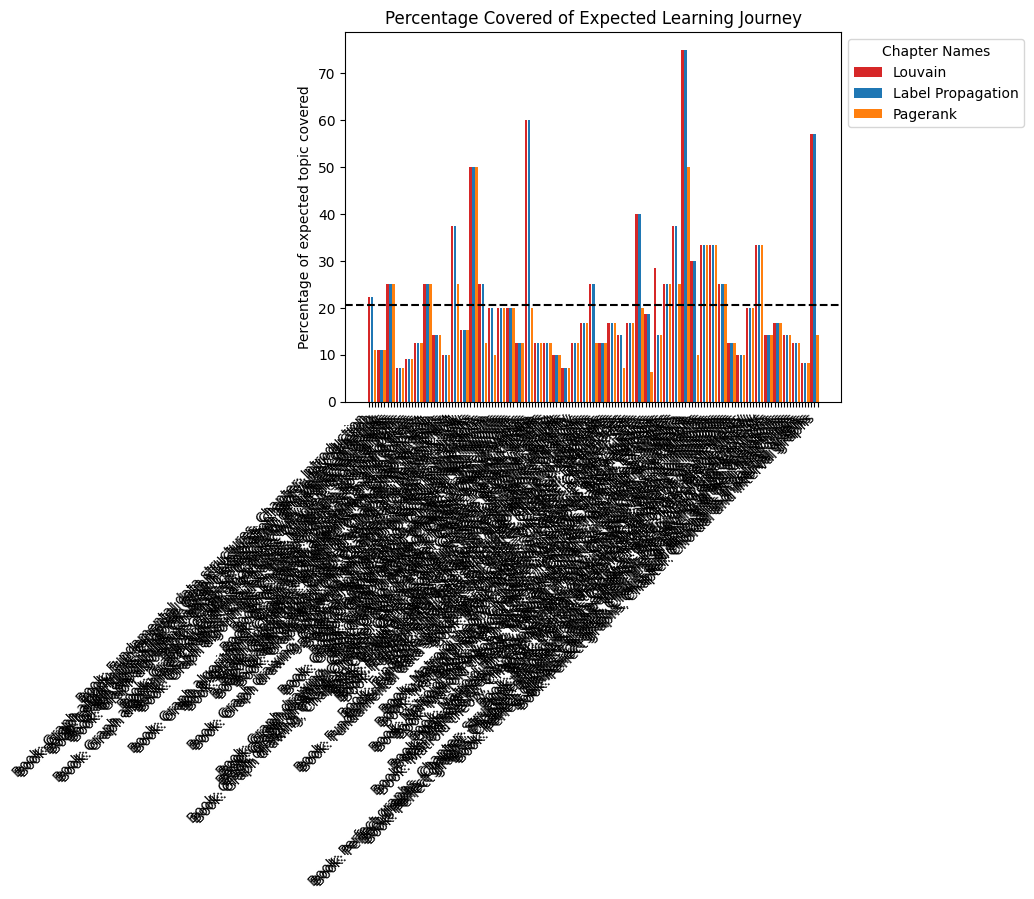

In [ ]:
chapter_graph_builder = GraphBuilder(len(data_store.get_chapters()))
logger.info(f"Length of the chapters are {len(data_store.get_chapters())}")
logger.info(f"Length of the chapters static are {len(data_store.get_chapters_static())}")

failures = 0

# Use an array to store dataframes to average them
chapter_evaluations = []
percentages = []
scraper_percentages = []
percentage_errors = []
start_links = []
chapters = []

chapter_counter = 0

for link, learning_links in data_store.get_chapters().items():
    # if chapter_counter > 1:
    #     break
    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
    <!-- Materialize CSS -->
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">
    
    <!-- Material Icons -->
    <link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet">
    </head>
    <body>
    <h3 class="custom-header">For learning map: {link}</h3>

    <!-- Materialize JavaScript -->
    <script src="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/js/materialize.min.js"></script>
    </body>
    </html>
    """


    display(HTML(html_content))
    link = link.replace(f"https://{SUBECT_PREFIX}.wikipedia.org/wiki/", "")
    try:
        print("Test")
        print(learning_links)
        start_link = learning_links[0]["href"].replace(f"https://{SUBECT_PREFIX}.wikipedia.org/wiki/", "")
    except IndexError:
        logger.info(f"Error creating the learning map: {link}")
        failures += 1
        continue
    # Commenting out for now as one learning journey is focused on
    if not os.path.exists(f'{start_link}_visualisation_data_graph.json'):
        run_scraper(start_link)
        
    
    with open(f'{start_link}_visualisation_data_graph.json', 'r') as f:
        network_data = json.load(f)
    graph = nx.node_link_graph(network_data)

    try:
        community_detection_comparison = CommunityDetectionComparison(graph, start_link, [node["href"] for node in learning_links])
        community_evaluations = community_detection_comparison.get_evaluations()
        chapter_evaluations.append(community_evaluations.copy())
        logger.info(f"For the following link: {start_link}, these nodes are ok:")
        display(community_evaluations)
        chapter_graph_builder.plot_graph(community_evaluations, f"Learning journey for book {learning_links[0]['book']} chapter {link}")
        percentages.append(community_evaluations["percentage_covered"].values)
        scraper_percentages.append(community_evaluations["scraper_percentage_covered"].values)
        print("What are the values?")
        print(community_evaluations)
        start_links.append([link for _ in range(3)])
        chapters.append([learning_links[0]['book'] for _ in range(3)])
        chapter_counter += 1
    except Exception:
        logger.info("Unable to parse specific learning journey, reason is:")
        logger.info(traceback.format_exc())
        
chapter_graph_builder.show_plots()
if failures:
    logger.warning(f"{failures} failures")
    
    
percentage_fig, percentage_ax = plt.subplots()

bar_labels = ['Louvain', 'Label Propagation', 'Pagerank']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']


start_links_total = [i.replace("_", " ").capitalize() for i in flatten(start_links)]
chapters_total = [i.replace(f"https://{SUBECT_PREFIX}.wikipedia.org/wiki/User:David_Eppstein/", "").replace("_", " ").capitalize() for i in flatten(chapters)]
percentages_total = flatten(percentages)
scraper_percentages_total = flatten(scraper_percentages)
percentages_total = np.array(percentages_total)
scraper_percentages_total = np.array(scraper_percentages_total)
colors = ['tab:red', 'tab:blue', 'tab:orange']
bar_colors = np.array([color for color in colors * chapter_counter])
labels = ['_Louvain', '_Label Propagation', '_Pagerank']
bar_labels = [label for label in labels * chapter_counter]
bar_labels = np.array(['Louvain', 'Label Propagation', 'Pagerank'] + bar_labels[3:])
stubs = np.arange(len(start_links_total))
print("Debugging")
print(percentages_total)
print(scraper_percentages_total)
print(bar_labels)
print(bar_colors)
percentage_ax.bar(stubs, percentages_total, label=bar_labels, color=bar_colors)
percentage_ax.set_xticks(stubs)
xticks = [f"Book: {bk}, Chapter: {chptr}" for bk, chptr in zip(chapters_total, start_links_total)]
percentage_ax.set_xticklabels(xticks, rotation=45, ha='right')
percentage_ax.set_ylabel('Percentage of expected topic covered')
percentage_ax.set_title('Percentage Covered of Expected Learning Journey')
percentage_ax.legend(title='Chapter Names', loc='upper left', bbox_to_anchor=(1, 1))
average_percentage_covered = np.average(percentages_total)
percentage_ax.axhline(y=average_percentage_covered, linestyle='--', label='Average', color='k')
print(f"Average is: {average_percentage_covered}")

In [ ]:
tabular_data = pd.DataFrame({
    "Book": chapters_total,
    "Chapter": start_links_total,
    "Methods": [label.replace("_", "") for label in bar_labels],
    "Percentage Covered": percentages_total,
    "Scraper Percentage Covered": scraper_percentages_total,
})

latex_table = tabular_data.to_latex(index=False, column_format="lrr", caption="Comparison of Methods", label="tab:comparison")
print(latex_table)
# Save the DataFrame to a CSV file
tabular_data.to_csv('full_comparison_data.csv', index=False)
tabular_data.describe()

\begin{table}
\caption{Comparison of Methods}
\label{tab:comparison}
\begin{tabular}{lrr}
\toprule
Book & Chapter & Methods & Percentage Covered & Scraper Percentage Covered \\
\midrule
Fundamental data structures & Introduction & Louvain & 22.222222 & 88.888889 \\
Fundamental data structures & Introduction & Label Propagation & 22.222222 & 88.888889 \\
Fundamental data structures & Introduction & Pagerank & 11.111111 & 88.888889 \\
Graph algorithms & Graph exploration and vertex ordering & Louvain & 11.111111 & 44.444444 \\
Graph algorithms & Graph exploration and vertex ordering & Label Propagation & 11.111111 & 44.444444 \\
Graph algorithms & Graph exploration and vertex ordering & Pagerank & 11.111111 & 44.444444 \\
Graph algorithms & Connectivity of undirected graphs & Louvain & 25.000000 & 50.000000 \\
Graph algorithms & Connectivity of undirected graphs & Label Propagation & 25.000000 & 50.000000 \\
Graph algorithms & Connectivity of undirected graphs & Pagerank & 25.000000 & 50

Percentage Covered  Scraper Percentage Covered
count          147.000000                  147.000000
mean            20.604916                   45.829545
std             13.231697                   21.540198
min              6.250000                    9.090909
25%             12.500000                   33.333333
50%             16.666667                   42.857143
75%             25.000000                   60.000000
max             75.000000                  100.000000

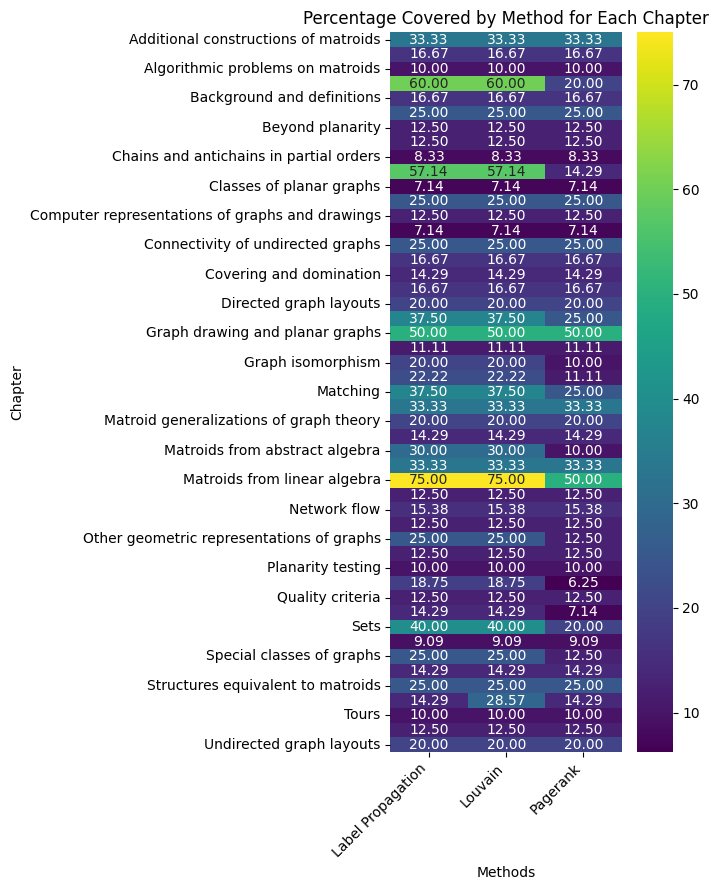

In [5]:
# Create a pivot table to show percentage covered for each method by chapter
chapter_method_pivot = tabular_data.pivot(index='Chapter', columns='Methods', values='Percentage Covered')

plt.figure(figsize=(7, 9))
sns.heatmap(chapter_method_pivot, annot=True, cmap='viridis', fmt='.2f')
plt.title('Percentage Covered by Method for Each Chapter')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
# TODO double check chapter count and that  
data_store.get_chapters()

{'Introduction': [{'text': 'Array data type',
   'href': 'https://en.wikipedia.org/wiki/Array_data_type',
   'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'},
  {'text': 'Array data structure',
   'href': 'https://en.wikipedia.org/wiki/Array_data_structure',
   'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'},
  {'text': 'Dynamic array',
   'href': 'https://en.wikipedia.org/wiki/Dynamic_array',
   'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'},
  {'text': 'Linked list',
   'href': 'https://en.wikipedia.org/wiki/Linked_list',
   'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'},
  {'text': 'Doubly linked list',
   'href': 'https://en.wikipedia.org/wiki/Doubly_linked_list',
   'book': 'https://en.wikipedia.org/wiki/User:David_Eppstein/Fundamental_Data_Structures'},
  {'text': 'Stack (abstract data type)',
   'href': 'https://en.w

In [ ]:
# Analyse performance across different books
book_method_pivot = tabular_data.pivot(index='Book', columns='Methods', values='Percentage Covered')

plt.figure(figsize=(15, 8))
sns.heatmap(book_method_pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Percentage Covered by Method for Each Book')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:

combined_df = pd.concat(chapter_evaluations)
# average_df = combined_df.groupby(combined_df.index).mean()
combined_df

precision    recall  f1_score  accuracy  \
louvain_communities             0.100000  0.222222  0.137931  0.100000   
label_propagation_communities   0.133333  0.222222  0.166667  0.133333   
pagerank                        0.125000  0.111111  0.117647  0.125000   
louvain_communities             0.076923  0.111111  0.090909  0.076923   
label_propagation_communities   0.058824  0.111111  0.076923  0.058824   
...                                  ...       ...       ...       ...   
label_propagation_communities   0.055556  0.083333  0.066667  0.055556   
pagerank                        0.125000  0.083333  0.100000  0.125000   
louvain_communities             0.222222  0.571429  0.320000  0.222222   
label_propagation_communities   0.200000  0.571429  0.296296  0.200000   
pagerank                        0.125000  0.142857  0.133333  0.125000   

                               percentage_covered  journey_size  actual_size  \
louvain_communities                     77.777778            20            9   
label_propagation_communities           77.777778            15            9   
pagerank                                88.888889             8            9   
louvain_communities                     88.888889            13            9   
label_propagation_communities           88.888889            17            9   
...                                           ...           ...          ...   
label_propagation_communities           91.666667            18           12   
pagerank                                91.666667             8           12   
louvain_communities                     42.857143            18            7   
label_propagation_communities           42.857143            20            7   
pagerank                                85.714286             8            7   

                                                      predicted_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Library_(comput...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Programmer, htt...   
pagerank                       [https://en.wikipedia.org/wiki/Vector_(mathema...   
louvain_communities            [https://en.wikipedia.org/wiki/Connected-compo...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Sublinear_time,...   
...                                                                          ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Treewidth, http...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_theory, h...   
louvain_communities            [https://en.wikipedia.org/wiki/Triangle-free_g...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Triangle-free_g...   
pagerank                       [https://en.wikipedia.org/wiki/Graph_theory, h...   

                                                         actual_learning_journey  \
louvain_communities            [https://en.wikipedia.org/wiki/Array_data_type...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Array_data_type...   
pagerank                       [https://en.wikipedia.org/wiki/Array_data_type...   
louvain_communities            [https://en.wikipedia.org/wiki/Component_(grap...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Component_(grap...   
...                                                                          ...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Chordal_graph, ...   
pagerank                       [https://en.wikipedia.org/wiki/Chordal_graph, ...   
louvain_communities            [https://en.wikipedia.org/wiki/Distance-heredi...   
label_propagation_communities  [https://en.wikipedia.org/wiki/Distance-heredi...   
pagerank                       [https://en.wikipedia.org/wiki/Distance-heredi...   

                               Jaccard Coefficient  
louvain_communities                       0.074074  
label_propagation_communities             0.090909  
page

2024-11-14 20:54:41,401 - __main__ - INFO - Shape of the array is
2024-11-14 20:54:41,401 - __main__ - INFO - 10
2024-11-14 20:54:41,402 - __main__ - INFO - Index(['louvain_communities', 'label_propagation_communities', 'pagerank'], dtype='object')
2024-11-14 20:54:41,422 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-14 20:54:41,426 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


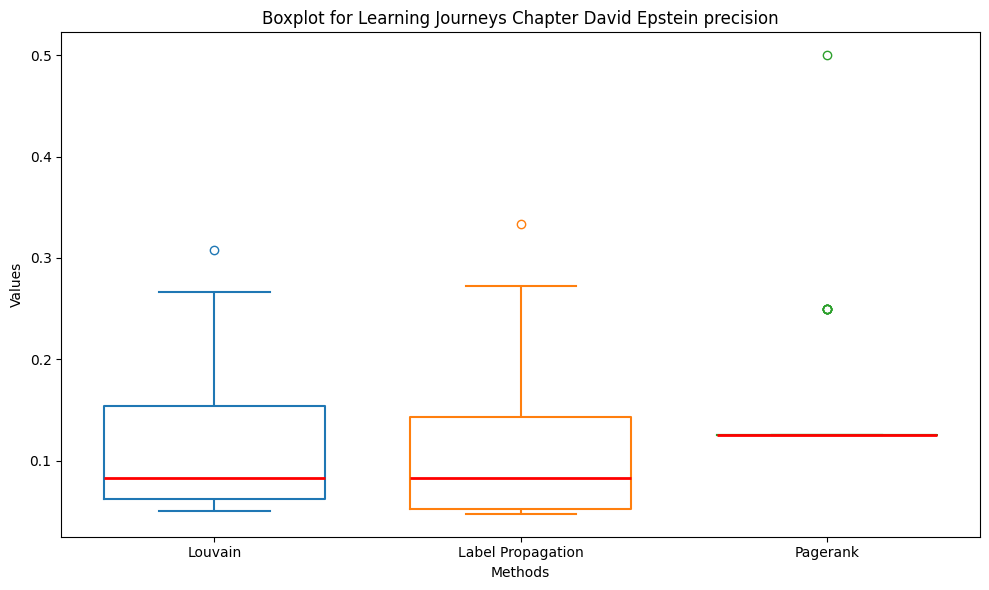

2024-11-14 20:54:41,518 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-14 20:54:41,535 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


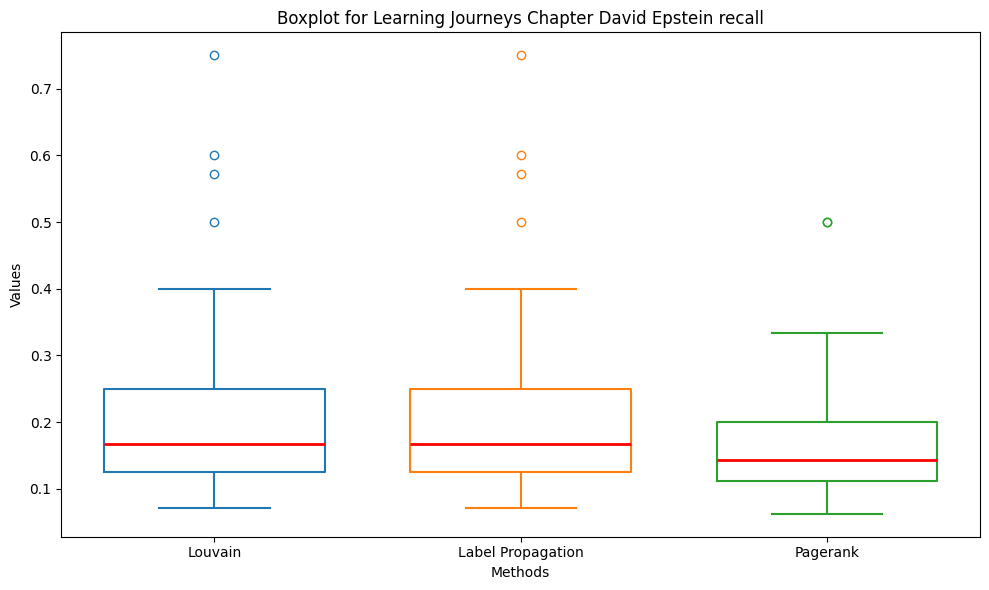

2024-11-14 20:54:41,644 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-14 20:54:41,647 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


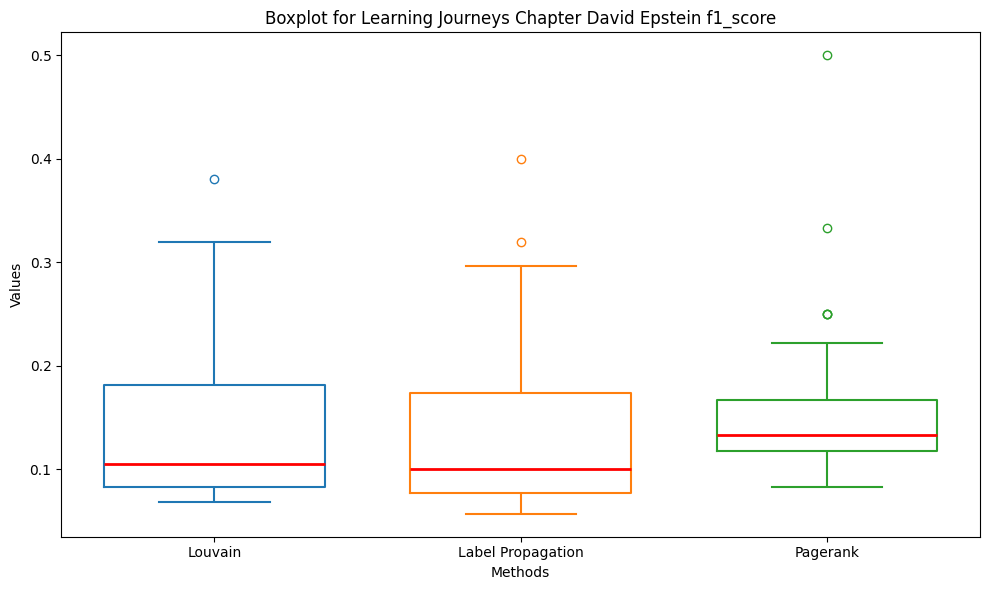

2024-11-14 20:54:41,744 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-14 20:54:41,747 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


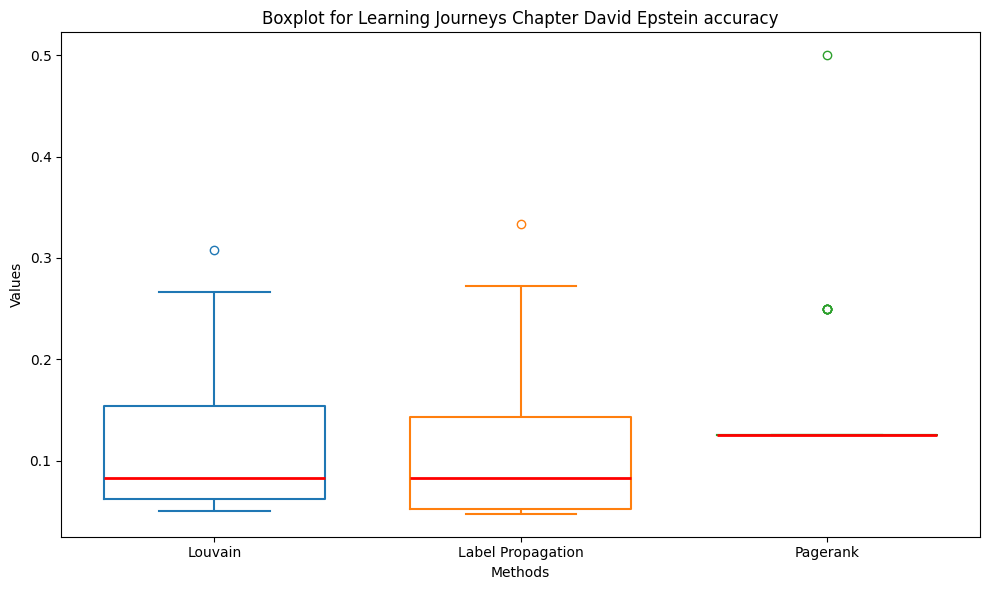

2024-11-14 20:54:41,833 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-14 20:54:41,836 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


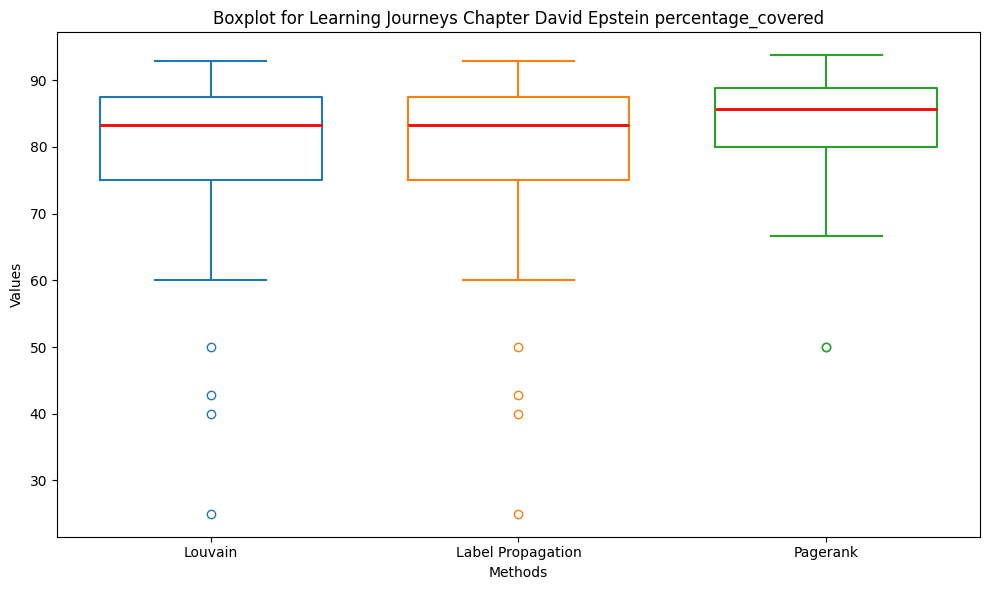

2024-11-14 20:54:41,924 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-14 20:54:41,927 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


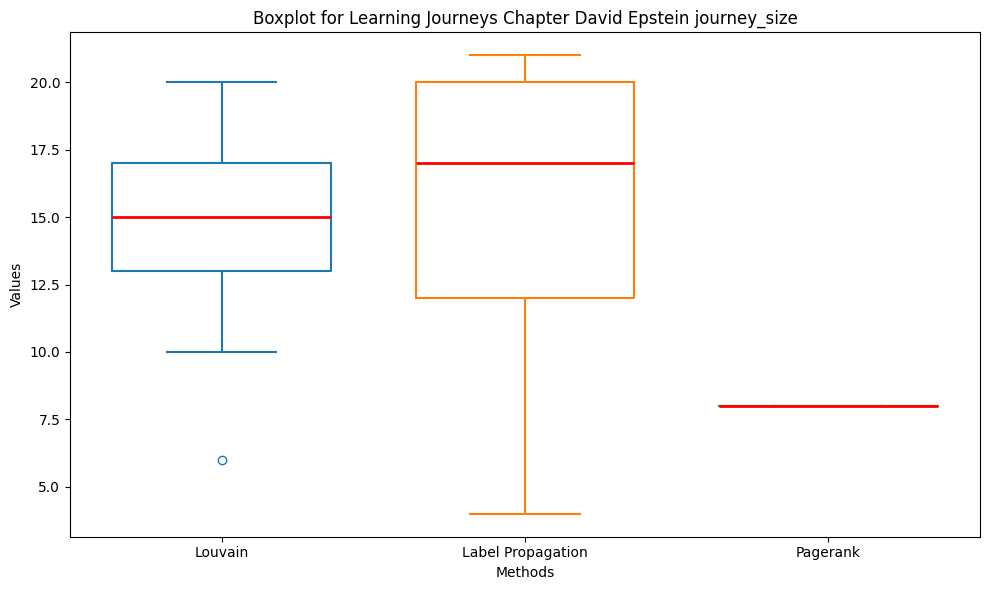

2024-11-14 20:54:42,016 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-14 20:54:42,019 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


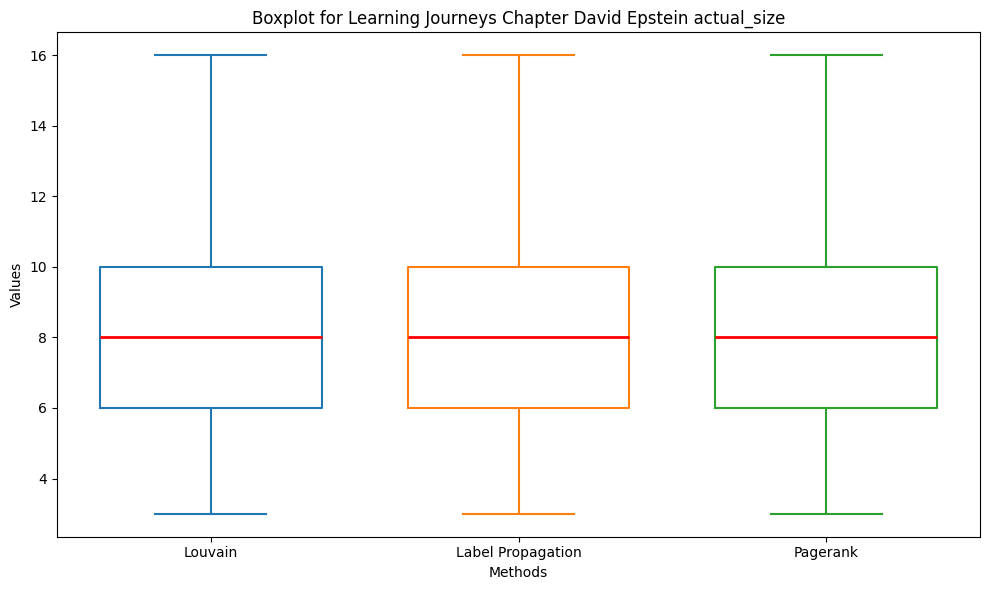

2024-11-14 20:54:42,140 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-14 20:54:42,143 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


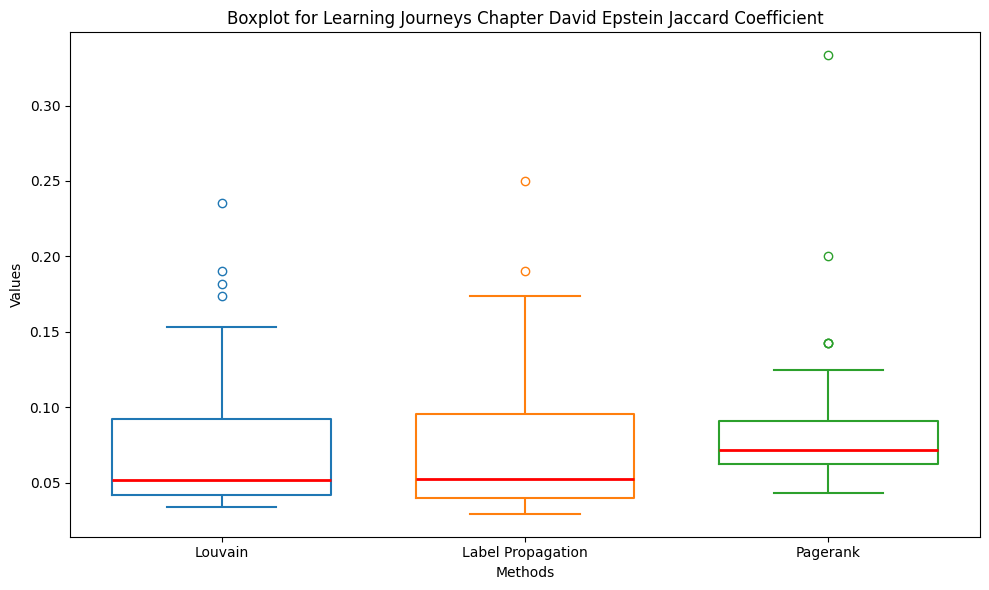

[np.float64(0.1), np.float64(0.07692307692307693), np.float64(0.18181818181818182), np.float64(0.08333333333333333), np.float64(0.0625), np.float64(0.06666666666666667), np.float64(0.05), np.float64(0.05555555555555555), np.float64(0.05555555555555555), np.float64(0.1875), np.float64(0.15384615384615385), np.float64(0.3076923076923077), np.float64(0.18181818181818182), np.float64(0.11764705882352941), np.float64(0.05555555555555555), np.float64(0.05), np.float64(0.08333333333333333), np.float64(0.2), np.float64(0.07692307692307693), np.float64(0.058823529411764705), np.float64(0.06666666666666667), np.float64(0.06666666666666667), np.float64(0.09090909090909091), np.float64(0.05), np.float64(0.14285714285714285), np.float64(0.05), np.float64(0.16666666666666666), np.float64(0.15384615384615385), np.float64(0.09090909090909091), np.float64(0.26666666666666666), np.float64(0.17647058823529413), np.float64(0.15384615384615385), np.float64(0.05555555555555555), np.float64(0.1875), np.float

In [ ]:
logger.info("Shape of the array is")
logger.info(f"{chapter_evaluations[0].columns.size}")
logger.info(f"{chapter_evaluations[0].index}")

cleaned_data = np.array([frame.drop(['predicted_learning_journey', 'actual_learning_journey'], axis=1).values for frame in chapter_evaluations])

mean_data = cleaned_data.mean(axis=0)
min_data = cleaned_data.min(axis=0)
max_data = cleaned_data.max(axis=0)

def aggregate_stats(data):
    return np.vstack((
        np.min(data, axis=0),
        np.percentile(data, 25, axis=0),
        np.median(data, axis=0),
        np.mean(data, axis=0),
        np.percentile(data, 75, axis=0),
        np.max(data, axis=0)
    ))

def build_aggregate_dataframe(data):
    first_frame = chapter_evaluations[0].drop(['predicted_learning_journey', 'actual_learning_journey'], axis=1).copy()
    aggregate_indexes = first_frame.index
    aggregate_columns = first_frame.columns
    return pd.DataFrame(
        data=data,
        index=aggregate_indexes,
        columns=aggregate_columns
    )

mean_frame = build_aggregate_dataframe(mean_data)

# reshaped_data = cleaned_data.reshape(3, 8, 14)
# reshaped_data = np.transpose(cleaned_data, (0, 1, 2)) FAILED
reshaped_data = np.transpose(cleaned_data, (2, 1, 0)) # Correct working

first_frame = chapter_evaluations[0].drop(['predicted_learning_journey', 'actual_learning_journey'], axis=1).copy()

for idx, parameter in enumerate(reshaped_data):
    # Create a new figure for each parameter
    plt.figure(figsize=(10, 6))
    
    # Create the boxplot
    sns.boxplot(data=parameter.T, fill=False, gap=0.1, medianprops={"color": "red", "linewidth": 2})
    
    # Set y-axis to log scale
    # plt.yscale('symlog', linthresh=1e-5)
    
    # Adjust y-axis limits if needed
    # plt.ylim(bottom=1e-6)  # Uncomment and adjust as necessary
    
    # Add labels and title
    plt.xlabel('Methods')
    plt.xticks(range(3), ['Louvain', 'Label Propagation', 'Pagerank'])
    # plt.ylabel('Values (log scale)')
    plt.ylabel('Values')
    plt.title(f'Boxplot for Learning Journeys Chapter David Epstein {list(first_frame.columns)[idx]}')
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
cleaned_data.shape

print([i[0][0] for i in  cleaned_data])
print(list(reshaped_data[0][0]))

# Shape test
assert [i[0][0] for i in  cleaned_data] == list(reshaped_data[0][0])

In [ ]:
cleaned_data

array([[[ 0.1       ,  0.22222222,  0.13793103, ..., 20.        ,
          9.        ,  0.07407407],
        [ 0.13333333,  0.22222222,  0.16666667, ..., 15.        ,
          9.        ,  0.09090909],
        [ 0.125     ,  0.11111111,  0.11764706, ...,  8.        ,
          9.        ,  0.0625    ]],

       [[ 0.07692308,  0.11111111,  0.09090909, ..., 13.        ,
          9.        ,  0.04075058],
        [ 0.05882353,  0.11111111,  0.07692308, ..., 17.        ,
          9.        ,  0.04      ],
        [ 0.125     ,  0.11111111,  0.11764706, ...,  8.        ,
          9.        ,  0.0625    ]],

       [[ 0.18181818,  0.25      ,  0.21052632, ..., 11.        ,
          8.        ,  0.09625223],
        [ 0.1       ,  0.25      ,  0.14285714, ..., 20.        ,
          8.        ,  0.07692308],
        [ 0.25      ,  0.25      ,  0.25      , ...,  8.        ,
          8.        ,  0.14285714]],

       ...,

       [[ 0.07692308,  0.125     ,  0.0952381 , ..., 13.       